# 2024 Phillies Preview

Videos to watch when I am not on a train to Boston:
- Taijuan Walker Zone 7 Sinkers (they are good!) He will be on the IL to start the year.
- The one swinging pitchout thrown by Jeremy Hellickson on May 24, 2016. That was good.
- The 8 hits off of Jeff Hoffman's slider in 2023, some of the biggest hits given up all year.
- Spencer Turnbull this spring, his sweeper. None of his videos are correct lol.

## Run Functions

In [208]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




Length of nphl dataframe: 311816
Length of phils_sc dataframe: 407099


## Player Previews

### Ranger Suarez

In [3]:
ranger = pps[pps.pitcher == 624133] #pps[pps.player_name == 'Suárez, Ranger']

In [4]:
# Splits: stand, count, outs, inning, month, ballpark, opponent, batter, batter archetype, game_year
# Stats: pitch selection, zone, speed/spin, batting performance against

In [5]:
# Career Results
x = ranger
df = last_pitch_abs(x)
level = 'player_name'
results(level)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Suárez, Ranger",7792,2051,1430,456,44,163,441,0.246,0.308,0.373,0.68,0.298


In [6]:
len(ranger)

7792

In [7]:
# Righties
pitch_mix(ranger[ranger.stand == 'R'])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,1823,92.696325,1903.247525,9.170598,29.6
0,CH,Changeup,1496,84.375401,1499.767629,11.675802,24.3
3,FF,4-Seam Fastball,1420,93.247746,1955.434415,7.847887,23.1
1,CU,Curveball,633,76.126540,2196.407348,11.011058,10.3
2,FC,Cutter,505,88.726733,2037.966068,8.475248,8.2
5,SL,Slider,274,84.153650,2093.396825,10.354015,4.5


In [8]:
# Lefties
pitch_mix(ranger[ranger.stand == 'L'])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,979,92.489888,1900.100204,9.338100,59.7
3,FF,4-Seam Fastball,219,93.458904,1964.132420,8.150685,13.3
0,CH,Changeup,185,84.285946,1515.843243,10.859459,11.3
5,SL,Slider,160,83.723125,2097.928571,9.881250,9.8
2,FC,Cutter,55,86.196364,2079.763636,10.600000,3.4
1,CU,Curveball,43,76.941860,2213.720930,11.232558,2.6


In [9]:
x = ranger
df = last_pitch_abs(x)
level = 'player_name'
results(level)


,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Suárez, Ranger",7792,2051,1430,456,44,163,441,0.246,0.308,0.373,0.68,0.298


### Kyle Schwarber

In [10]:
sc = pd.concat([phils_sc, nphl])
src = sc[sc.player_name == 'Schwarber, Kyle']

In [11]:
df = last_pitch_abs(x)

In [12]:
kyle = mcgs(level, df).loc[:, [level
                        ,'ba'
                        ,'obp'
                        ,'slg'
                        ,'ops'
                        ,'woba'
                        ,'pitches'
                        ,'plate_apps'
                        ,'at_bats'
                               ,'hrs'
                               ,'strikeouts'
                               ,'walks'
                       ]
                   ].round(3)

In [13]:
kyle['hrs-to-plate_apps'] = kyle['hrs'] / kyle['plate_apps']
kyle['hrs-to-plate_apps'] = kyle['hrs-to-plate_apps'].round(3)

In [14]:
schwarber = src
x = schwarber
level = 'game_year'
df = last_pitch_abs(x)
mu = mu_plate_apps_per_year = results(level).plate_apps.mean()
std = std_plate_apps_per_year = results(level).plate_apps.std()


In [15]:
median = median_plate_apps_per_year = results(level).plate_apps.median()

In [16]:
ks_HR_rate = median * results(level).hrs.sum() / results(level).plate_apps.sum()

In his **median** (506) plate appearance season, Kyle Schwarber would hit **32 home runs** at the rate he has hit home_runs-to-plate_apps in his career.

In [17]:
reg_schwarber = df[df.game_type == 'R']
playoff_schwarber = df[df.game_type != 'R']

In [18]:
x = reg_schwarber
df = last_pitch_abs(x)
level = 'player_name'
data = results(level)
data['hrs_plate_apps_ratio'] = round(data['hrs'] / data['plate_apps'], 2)
data['hrs_per_year'] = round(data['hrs'] / reg_schwarber.game_year.nunique(), 2)

In [19]:
data['plate_apps_hrs_ratio'] = round(1 / data.hrs_plate_apps_ratio,2)

In [20]:
goal = 500
current = data.hrs.iloc[0]
needed = goal - current
rate = ks_HR_rate

In [21]:
needed # he hits 32 home runs in his median plate appearance season, but he hits 27 homers in his average season

254

In [22]:
seasons_to_goal = needed/rate

In [23]:
round(seasons_to_goal,2)

7.91

In [24]:
# Schwarber hits how many home runs in an average season.
# How many more average seasons would he need to have to reach 500 home runs?
# Exclude 2020

In [25]:
# hrs / year * 

In [26]:
round(mu,1), round(std,2)

(465.8, 241.81)

In [27]:
level = 'player_name'

In [28]:
# df = kyle
# for cx, cy in df.loc[:, ['hrs', 'pitches', 'plate_apps', 'at_bats','strikeouts','walks']]:
#     df['{}-to-{}'.format(cx,cy)] = df[cx] / df[cy]

In [29]:
df = kyle
df

,player_name,ba,obp,slg,ops,woba,pitches,plate_apps,at_bats,hrs,strikeouts,walks,hrs-to-plate_apps
0,"Suárez, Ranger",0.246,0.308,0.373,0.68,0.298,7792,2051,1855,44,441,163,0.021


In [30]:
x = schwarber = src = sc[sc.player_name == 'Schwarber, Kyle']
df = last_pitch_abs(x)
#level = ['p_throws']
#results(level)

#### Source

In [31]:
sc = pd.concat([phils_sc, nphl])
src = sc[sc.player_name == 'Schwarber, Kyle']

In [32]:
print('Pitches: ', len(src)
      ,'| Games: ', src.game_pk.nunique()
      ,'| Dongs: ', len(src[src.events == 'home_run'])
     )

Pitches:  17955 | Games:  1042 | Dongs:  266


In [33]:
stat = 'home_run'
src[src.events == stat].groupby('game_type', as_index=False).agg({'description' : 'count'}).rename(columns = {'description' : stat})

,game_type,home_run
0,D,3
1,F,2
2,L,12
3,R,246
4,W,3


In [34]:
src[src.game_year == 2023]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B_yamomma,w2B_yamomma,w3B_yamomma,wHR_yamomma,runSB_yamomma,runCS_yamomma,R/PA_yamomma,R/W_yamomma,cFIP_yamomma,source
355620,SI,2023-10-01,92.1,-2.31,5.43,"Schwarber, Kyle",656941,676130,field_out,hit_into_play,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
355623,SI,2023-10-01,92.1,-2.49,5.37,"Schwarber, Kyle",656941,676130,NaN,called_strike,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
355624,SI,2023-10-01,92.1,-2.38,5.43,"Schwarber, Kyle",656941,676130,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
355627,FF,2023-10-01,94.1,-2.32,5.51,"Schwarber, Kyle",656941,676130,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
355629,CH,2023-10-01,87.3,-2.55,5.40,"Schwarber, Kyle",656941,676130,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381634,SI,2023-10-03,96.3,-1.48,6.12,"Schwarber, Kyle",656941,623211,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
381637,FF,2023-10-03,98.3,2.33,6.08,"Schwarber, Kyle",656941,666200,single,hit_into_play,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
381645,SL,2023-10-03,86.8,2.35,6.02,"Schwarber, Kyle",656941,666200,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
381647,FF,2023-10-03,97.4,2.12,6.15,"Schwarber, Kyle",656941,666200,NaN,foul,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN


#### Target

In [35]:
df = pos
level = 'game_year'
event = 'strikeout'

tgt = ks_filter(df, 'player_name', 'Schwarber, Kyle')

## Single Event
e = event
summarize_events(tgt, e)

## Loop Through All Events
for e in tgt.events.unique().tolist():
    summarize_events(tgt, e)

Pitches:  6506 | Games:  345 | strikeout:  449
Pitches:  6506 | Games:  345 | strikeout:  449
Pitches:  6506 | Games:  345 | nan:  0
Pitches:  6506 | Games:  345 | field_out:  518
Pitches:  6506 | Games:  345 | walk:  223
Pitches:  6506 | Games:  345 | home_run:  104
Pitches:  6506 | Games:  345 | single:  113
Pitches:  6506 | Games:  345 | triple:  4
Pitches:  6506 | Games:  345 | hit_by_pitch:  13
Pitches:  6506 | Games:  345 | double:  44
Pitches:  6506 | Games:  345 | force_out:  9
Pitches:  6506 | Games:  345 | grounded_into_double_play:  15
Pitches:  6506 | Games:  345 | field_error:  4
Pitches:  6506 | Games:  345 | sac_fly:  7
Pitches:  6506 | Games:  345 | double_play:  1
Pitches:  6506 | Games:  345 | pickoff_1b:  1
Pitches:  6506 | Games:  345 | pickoff_caught_stealing_2b:  2
Pitches:  6506 | Games:  345 | fielders_choice_out:  2


In [36]:
e = 'walk'
summarize_events(tgt, e)
## 550 walks

Pitches:  6506 | Games:  345 | walk:  223


In [37]:
e = 'strikeout'
summarize_events(tgt, e)
## 1197 strikeouts

Pitches:  6506 | Games:  345 | strikeout:  449


In [38]:
df = tgt
level = 'pitch_number'
results(level)

,pitch_number,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,1,1511,127.0,125.0,46.0,19.0,0.0,0.0,0.371,0.378,0.944,1.322,0.542
1,2,1387,150.0,145.0,48.0,17.0,0.0,0.0,0.329,0.340,0.747,1.087,0.454
2,3,1235,206.0,148.0,52.0,20.0,0.0,58.0,0.252,0.252,0.587,0.840,0.352
3,4,1027,307.0,143.0,48.0,17.0,31.0,130.0,0.177,0.267,0.387,0.655,0.287
4,5,719,318.0,121.0,29.0,13.0,71.0,123.0,0.120,0.324,0.289,0.613,0.291
5,6,401,247.0,90.0,24.0,10.0,72.0,84.0,0.138,0.393,0.368,0.761,0.352
6,7,153,106.0,36.0,13.0,5.0,33.0,36.0,0.181,0.443,0.403,0.846,0.389
7,8,47,32.0,8.0,1.0,1.0,12.0,12.0,0.053,0.406,0.211,0.617,0.322
8,9,15,9.0,3.0,3.0,1.0,2.0,4.0,0.429,0.556,0.857,1.413,0.572
9,10,6,3.0,2.0,1.0,1.0,0.0,1.0,0.333,0.333,1.333,1.667,0.691


In [39]:
df[(df.pitch_type == 'SI') # Sinkers
   &(df.p_throws == 'R') # by RHP
   &(df.zone.isin([3,6,9])) # inside
   #&(df.events == 'home_run') # 4 dongs, he hit two in 2023 tho
   &(df.events == 'strikeout') ## 22 punchies
   &(df.description == 'called_strike') # 18 backwards Ks
   &(df.game_year.isin([2022,2023]))
  ][['game_date','release_speed','release_pos_x'
    ,'release_pos_z'
    ,'pfx_x'
    ,'pfx_z'
    ,'release_spin_rate']]

,game_date,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,release_spin_rate
161965,2022-07-17,93.5,-3.28,6.15,-1.37,0.74,2029.0
163556,2022-07-03,90.5,-0.83,6.24,-0.99,1.42,2301.0
168465,2022-05-29,94.6,-1.37,5.32,-1.46,0.50,2141.0
179719,2023-09-18,92.3,-1.77,5.13,-0.65,0.05,2271.0
198440,2023-04-27,96.1,-1.53,5.93,-1.32,0.68,2211.0
199061,2023-04-21,94.0,-1.87,5.91,-1.01,0.76,2341.0


### Kolby Allard (WHO?)

Lefty from Atlanta and Texas. My guess is he is a funky guy who the Phillies think they can add a cutter to and make him pitch like Ranger or Cris Sanchez. Get a sense of his pitch repetoire:

Where I break things down like this:
- Bullet points
- Is this a shitty thing to do?
- It is how I wrap my head around things?

In [40]:
allard = nphl[nphl.player_name == 'Allard, Kolby'].merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

In [41]:
df = allard
def pitch_mix_by_season(df):
    pitch_mix_by_season = pd.DataFrame()
    for y in df.game_year.unique().tolist():
        #for s in df.stand.unique().tolist():
        pmbs = pitch_mix(df[(df.game_year == y)
                            #&(df.stand == s)
                           ]
                        )
        pmbs['year'] = y
        #pmbs['stand'] = s
        pitch_mix_by_season = pd.concat([pitch_mix_by_season, pmbs])
            
    return pitch_mix_by_season
df = pitch_mix_by_season(df)

In [42]:
year = df.year.unique().tolist()
col = df.usage
colors = df.pitch_type.unique().tolist()

In [43]:
total_pitch_mix = pitch_mix(allard)

In [44]:
lhb_pitch_mix = pitch_mix(allard[allard.stand == 'L'])

In [45]:
rhb_pitch_mix = pitch_mix(allard[allard.stand == 'R'])

#### Pitch Share by Season

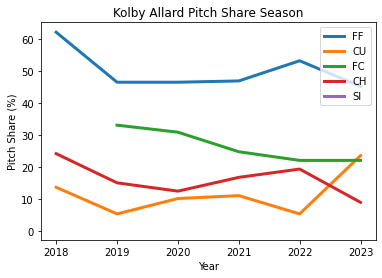

In [46]:
for pt in df.pitch_type.unique().tolist():
    ff = df[df.pitch_type == pt]
    plt.plot(ff.year.tolist()
             ,ff.usage.tolist()
             #,c = 'g'
             ,lw = 3
             ,label = pt
            )
    plt.legend(loc = 'upper right')

plt.xlabel('Year')
plt.ylabel('Pitch Share (%)')
plt.title('Kolby Allard Pitch Share Season')
plt.show()

#### Pitch Profile

In [47]:
for pt in total_pitch_mix.pitch_type.unique().tolist():
    print(total_pitch_mix[total_pitch_mix.pitch_type == pt].pitch_name.values[0]
          ,'(', round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_speed.values[0],2)
          ,',',round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_spin_rate.values[0],2)
          #,'avg break: '
          #,'avg zone: '
          ,')'
         )

4-Seam Fastball ( 91.5 , 2113.91 )
Cutter ( 86.52 , 2186.97 )
Changeup ( 82.78 , 1628.29 )
Curveball ( 75.64 , 1913.46 )
Sinker ( 92.49 , 2198.5 )


In [48]:
# Maybe they think they can introduce some legislation here to throw more sinkers
# Or maybe they don't think he profiles like Cristopher Sanchez

In [49]:
# df = cristopher_sanchez = pps[pps.pitcher==pitcher_id]
# #df[df.game_year == 2023]
# total_pitch_mix = pitch_mix(df)

# for pt in total_pitch_mix.pitch_type.unique().tolist():
#     print(total_pitch_mix[total_pitch_mix.pitch_type == pt].pitch_name.values[0]
#           ,'(', round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_speed.values[0],2)
#           ,',',round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_spin_rate.values[0],2)
#           #,'avg break: '
#           #,'avg zone: '
#           #,')'
#          )

In [50]:
# Find Phillies Pitchers Who Do Have Similar Profiles
# This will be at the pitch level and it appears to be Ranger without the Sinker and maybe Matt Strahm
# pt = 'FF'
for pt in df.pitch_type.unique().tolist():
    print(pt)
    comp_pt = df[df.pitch_type == pt]
    similar_pitchers = pps[(pps.pitch_type == pt)
        &(pps.release_speed >= comp_pt.release_speed.mean() - comp_pt.release_speed.std())
        &(pps.release_speed <= comp_pt.release_speed.mean() + comp_pt.release_speed.std())
        &(pps.p_throws == 'L')
       ].groupby(['player_name'],as_index=False
                ).agg({'des' : 'count'
                       ,'release_speed' : 'mean'
                       ,'release_spin_rate' : 'mean'
                      }
                     ).round(2
                            ).rename(columns = {'des' : 'pitches'
                                               }
                                     ).sort_values(by='pitches', ascending=False).head(5)
    print(similar_pitchers)

FF
       player_name  pitches  release_speed  release_spin_rate
14    Morgan, Adam      859          91.06            2338.82
5   Falter, Bailey      574          91.05            2042.03
13     Moore, Matt      249          91.36            2265.84
24  Suárez, Ranger      215          91.57            1954.69
6     Hamels, Cole      172          91.27            2075.50
CU
       player_name  pitches  release_speed  release_spin_rate
12  Suárez, Ranger      471          75.49            2187.73
2   Falter, Bailey      277          75.72            2059.32
7     Morgan, Adam      184          75.75            2694.61
6     Milner, Hoby      108          75.76            1892.88
3     Hamels, Cole       51          76.42            2242.22
FC
      player_name  pitches  release_speed  release_spin_rate
6     Smyly, Drew      212          86.34            2071.06
8  Suárez, Ranger      156          86.26            2070.23
7    Strahm, Matt       76          86.27            2459.84
1  

In [51]:
# This will be at the pitcher level
# Where the pitches average release_speed and release_spin fall within range of a single Allard SD of the Allard Mean
df = allard

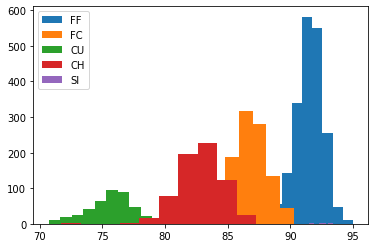

In [52]:
for pt in allard.pitch_type.unique().tolist():
    plt.hist(allard[allard.pitch_type == pt].release_speed, label = pt)
    plt.legend(loc = 'upper left')
plt.show()

#### Results

In [53]:
df = allard
results('player_name')
# They aren't great, Bob!

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Allard, Kolby",4208,1085,786,267,50,83,204,0.271,0.331,0.471,0.802,0.343


### Spencer Turnbull (who?)

In [54]:
# I guess he is some cunt who the Phillies signed today to be depth pitching option
# Or is he the next addition to the bullpen?

df = turnbull = nphl[nphl.player_name == 'Turnbull, Spencer'].merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

The Phillies made a signing today. **Spencer Turnbull** adds rotation depth to a team whose underlying numbers point toward elite run prevention.

For my money, we have moved to far away from this narrative around the Phillies being a slug team. They beat teams with the slug, but that is not how the Phillies did it last year? Or is it? I am still working through my 2023 analysis. Either way, I have anecdotally crafted the narrative that the Phillies pitching had some of the best xWOBA in all of baseball. This metric is a prediction of Phillies opponent offensive output, i.e., how good a player the Phillies are pitching to.

Spencer Turnbull is going to add supplemental innings to the team in 2024. It is a strong staff but lacks much depth on the 40 man roster or in the high minor leagues. Bailey Falter was traded last year after struggling to find consistency at the big-league level. Andrew Painter is out for the year after undergoing Tommy John surgery. Mick Abel was overwhelmed in AAA last year and should spend most of the season in the Lehigh Valley. Griff McGarry looks destined for the bullpen.

The guys who did eat those innings last year are all over 30 years old. Taijuan Walker threw the most pitches and recorded the third-most outs on the 2023 Phillies including 13 Postseason games in which he threw 0 pitches. Aaron Nola re-signed with Phillies for 7-for-177 which is pretty cool. Nola has thrown a ton of innings (many at high stakes) since his true breakout season in 2018. His easy delivery and low-velocity/high-movement/Nasty K guy approach lends itself to durability. Zack Wheeler was dominant in 2023 but saw dips in his velocity and spin rate, he is entering his age-34 season without a new deal on the final year of the 5-year/$100 million contract he signed ahead of the 2020 season that looks like a real stroke of genius for former Phillies GM Matt Klentak.

Dave Dombrowski and his regime frequently deliver on the pitching acquistion front. The Phillies have constructed a strong bullpen and manager Rob Thomson pulls the strings well. His aggressive hot-hand approach has been a boost to a unit that consistently struggled during the Klentak era. Brad Hand got the job done in 2022 despite not having great underlying numbers. Jeff Hoffman had the highest overperformance in xWOBA in all of baseball in 2023. Yunior Marte saved a baseball game for the 2023 Philadelphia Phillies. McKinley Moore is a human being. Ok, maybe that have not all been knocked out of the park. Craig Kimbrel was a super important part of the team last year before he was broken by Thomson's aggressiveness.

Orion Kerkering seems poised to be a high-leverage guy this year. Seranthony Dominguez is due for some positive regression after underperforming expectation last year. Gregory Soto certainly has the stuff to be a high-velo/high-K. What if he were a more traditional wonky lefty who just happened to throw the fastest pitch for the Phillies in 2023? Jose Alvarado performs like one of the best relievers in baseball when healthy since he starting throwing that Cotham Cutter. Matt Strahm logged a ton of innings for the Phillies last year, gobbling up 10% of all pitches thrown in 2023. He is another quality bullpen addition by Dombo. Jeff Hoffman did overperform his xWOBA by a large margin but he also had the 5th best xWOBA in all of baseball!

Andrew Bellatti was on a tear at the start of 2023, Thomson used him in 7 of the Phillies's first 10 games. He got injured in April and never carved out a role in the bullpen for the rest of the year. After getting strong results in 2022 despite mediocre underlying stuff, don't expect much from him in 2024. Connor Brogdon profiles as a Poor Man's Devin Williams, the only pitcher in baseball who throws a comparable high-spin/high-movement CH. 

Dylan Covey ate a decent chunk of innings last year and probably has the most similar profile to Turnbull. Search for a pattern among those who can consistently overperform expectation.

Robertson was a solid trade deadline acquisition last year after years of Ian Kennedy, Brandon Workman, Mike Morin (look at his 2019, oof!), anyone in 2018? 

The case for Mike Lo. Why couldn't it be Mike Lo?

#### Pitch Share by Season

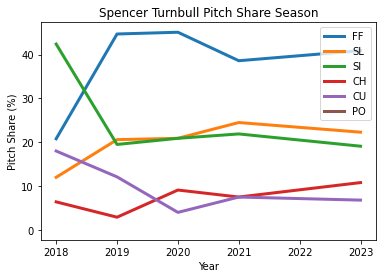

In [55]:
player = 'Spencer Turnbull'
df = pitch_mix_by_season(turnbull)
for pt in df.pitch_type.unique().tolist():
    ff = df[df.pitch_type == pt]
    plt.plot(ff.year.tolist()
             ,ff.usage.tolist()
             #,c = 'g'
             ,lw = 3
             ,label = pt
            )
    plt.legend(loc = 'upper right')

plt.xlabel('Year')
plt.ylabel('Pitch Share (%)')
plt.title('{} Pitch Share Season'.format(player))
plt.show()

#### Pitch Profile

In [56]:
total_pitch_mix = pitch_mix(turnbull)

lhb_pitch_mix = pitch_mix(turnbull[turnbull.stand == 'L'])

rhb_pitch_mix = pitch_mix(turnbull[turnbull.stand == 'R'])

for pt in total_pitch_mix.pitch_type.unique().tolist():
    print(total_pitch_mix[total_pitch_mix.pitch_type == pt].pitch_name.values[0]
          ,'(', round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_speed.values[0],2)
          ,',',round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_spin_rate.values[0],2)
          #,'avg break: '
          #,'avg zone: '
          ,')'
         )

4-Seam Fastball ( 93.6 , 2436.83 )
Sinker ( 94.33 , 2219.21 )
Slider ( 85.84 , 2478.95 )
Curveball ( 80.13 , 2587.99 )
Changeup ( 87.14 , 1853.92 )
Pitch Out ( 91.8 , 2443.0 )


#### Results

In [57]:
df = turnbull
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Turnbull, Spencer",5237,1313,888,292,24,117,279,0.252,0.331,0.384,0.715,0.312


Turnbull added a sweeper this year which is really quite something!

In [58]:
df = phils_sc
zones100 = results('zone')

df = turnbull
zonesST = results('zone')

df = zonesST.merge(zones100, left_on = 'zone', right_on = 'zone', suffixes = ('','_avg'))

df['woba_diff'] = df.woba - df.woba_avg
df[['zone'
    ,'woba'
    ,'woba_avg'
    ,'woba_diff'
   ]
  ]

,zone,woba,woba_avg,woba_diff
0,1.0,0.209,0.275,-0.066
1,2.0,0.305,0.325,-0.020
2,3.0,0.243,0.286,-0.043
3,4.0,0.358,0.346,0.012
4,5.0,0.353,0.397,-0.044
5,6.0,0.323,0.312,0.011
6,7.0,0.233,0.306,-0.073
7,8.0,0.400,0.350,0.050
8,9.0,0.247,0.274,-0.027
9,11.0,0.444,0.355,0.089


### Cristopher Sanchez

In [59]:
# Proud of this Cris Sanchez Pull
pps[(pps.pitch_type == 'CH') & (pps.game_year == 2023) & (pps.inning == 1) & (pps.p_throws == 'L')
   & (pps.game_date == '2023-08-30')
   ].loc[:, ['player_name','pitcher']]
#pps[pps.player_name == 'Sánchez, Cristopher']
pitcher_id = cristopher_sanchez_id = 650911
pps[pps.pitcher==pitcher_id]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
128434,CH,2021-10-02,85.1,1.88,6.07,"Sánchez, Cristopher",663743,650911,grounded_into_double_play,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
128436,CH,2021-10-02,84.6,1.92,6.08,"Sánchez, Cristopher",663743,650911,NaN,swinging_strike,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
128438,SI,2021-10-02,93.5,1.83,6.09,"Sánchez, Cristopher",663743,650911,NaN,foul,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
128441,SI,2021-10-02,93.5,1.83,6.02,"Sánchez, Cristopher",675649,650911,single,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
128443,SI,2021-10-02,95.9,1.81,6.06,"Sánchez, Cristopher",656577,650911,field_out,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201845,CH,2023-10-20,83.2,2.03,5.89,"Sánchez, Cristopher",682998,650911,field_out,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
201854,CH,2023-10-20,82.9,2.15,5.75,"Sánchez, Cristopher",682998,650911,NaN,ball,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
201867,SI,2023-10-20,92.8,2.03,5.89,"Sánchez, Cristopher",682998,650911,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
201873,SI,2023-10-20,92.9,1.97,5.90,"Sánchez, Cristopher",682998,650911,NaN,called_strike,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


In [60]:
df = cristopher_sanchez = pps[pps.pitcher==pitcher_id]
#df[df.game_year == 2023]
total_pitch_mix = pitch_mix(df)

for pt in total_pitch_mix.pitch_type.unique().tolist():
    print(total_pitch_mix[total_pitch_mix.pitch_type == pt].pitch_name.values[0]
          ,'(', round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_speed.values[0],2)
          ,',',round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_spin_rate.values[0],2)
          #,'avg break: '
          #,'avg zone: '
          ,')'
         )

Sinker ( 92.59 , 2026.38 )
Changeup ( 82.58 , 1891.07 )
Slider ( 83.34 , 2013.02 )


In [61]:
# Turn the above into functions so I can quickly run some analyses across multiple players

### Ranger Suarez

In [62]:
# Refactor Cris Sanchez to get Ranger Suarez
pps[(pps.pitch_type == 'CH') & (pps.game_year == 2023) & (pps.inning == 1) & (pps.p_throws == 'L')
   & (pps.game_date == pps.game_date.max())
   ].loc[:, ['player_name','pitcher']]
pitcher_id = ranger_suarez_id = 624133

df = ranger_suarez = pps[pps.pitcher==pitcher_id]
total_pitch_mix = pitch_mix(df)

for pt in total_pitch_mix.pitch_type.unique().tolist():
    print(total_pitch_mix[total_pitch_mix.pitch_type == pt].pitch_name.values[0]
          ,'(',total_pitch_mix[total_pitch_mix.pitch_type == pt].usage.values[0],'%'
          ,',', round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_speed.values[0],1),'mph'
          ,',',round(total_pitch_mix[total_pitch_mix.pitch_type == pt].release_spin_rate.values[0],2),'rpm'
          #,'avg break: '
          #,'avg zone: '
          ,')'
         )

Sinker ( 36.0 % , 92.6 mph , 1902.15 rpm )
Changeup ( 21.6 % , 84.4 mph , 1501.54 rpm )
4-Seam Fastball ( 21.0 % , 93.3 mph , 1956.6 rpm )
Curveball ( 8.7 % , 76.2 mph , 2197.52 rpm )
Cutter ( 7.2 % , 88.5 mph , 2042.1 rpm )
Slider ( 5.6 % , 84.0 mph , 2095.02 rpm )


#### No Way, Brother. It's Hosiery Day.

In [63]:
# Ok, that was awful. It is now time for Hosiery Day.
# How did Ranger Suarez wear his pants in every one of his 26 appearances

In [64]:
# Let's concoct a way to pull a single pitch from every single game

In [65]:
ranger[(ranger.game_year == 2023)
       &(ranger.stand == 'R')
      ].groupby(['pitcher'
                 ,'inning'
                ],as_index=False).agg({'game_pk' : 'nunique'})

,pitcher,inning,game_pk
0,624133,1,26
1,624133,2,26
2,624133,3,25
3,624133,4,25
4,624133,5,22
5,624133,6,17
6,624133,7,8
7,624133,8,1


In [66]:
df = ranger[ranger.game_year == 2023]
game_results = results('game_date')

In [67]:
game_dates = game_results.game_date.tolist()

socks = [
'long'
,'high'
,'long'
,'high'
# june
,'high'
,'high'
,'high'
,'high'
,'high'
# july
,'high'
,'high'
,'high'
,'long'
,'high'
# august
,'long'
,'long'
,'long'
# september
,'high'
,'high'
,'high'
,'high'
,'high'
# october
,'long'
,'long'
,'long'
,'long'
]

zipped = list(zip(game_dates,socks))

socks_df = pd.DataFrame(zipped, columns = ['game_date', 'pants'])

In [68]:
df = game_results.merge(socks_df, left_on = 'game_date', right_on = 'game_date')

In [69]:
df = ranger.merge(socks_df, left_on = 'game_date', right_on = 'game_date')
results('pants')

,pants,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,high,1504,395,266,87,10,37,89,0.247,0.319,0.389,0.708,0.310
1,long,785,217,155,55,4,13,49,0.275,0.313,0.405,0.718,0.309


### Zack Wheeler

In [70]:
# Can Wheeler sustain this load?
# What did he do to counter his declining velo and spin?
wheeler_np = pd.read_csv('wheeler_np.csv')
ppsw = wheeler_phils = pps[pps.player_name == 'Wheeler, Zack']
df = wheeler = pd.concat([wheeler_np, ppsw])
len(df), df.game_year.min()

(18286, 2017)

The interest piece here is Wheeler's use of the front door sinker. He will be able to get righties out with that nasty sweeper. He will still throw mid 90s with good movement even as his velo dips from his prime upper 90s fastball. Pairing that with a frisbee sweeper (83 mph, 2600 rpm, 20 inches of break) will be the next evolution of Zack Wheeler.

If he can pull off that transformation, then yes the Phillies should be giving money to Zack Wheeler. They tried to throw the most money at Yamamoto this offseason, it means the money is in there. In some ways it makes sense for the Phillies to keep themselves flexible in the long term by committing more money upfront to Wheeler. A deal for him in the range of Verlander or a DeGrom lite is probably the sticking point. He has been durable for the Phillies, and I imagine if his sweeper is not too hard on his arm there is reason to believe this success can be sustatined.

Ok, so I need a breakdown on the difference in approach by Wheeler to which side of the plate the batter stands on. 

**My To Do List**
- Wheeler vs R/L splits
- Wheeler pitch profile
- Wheeler season results

#### Wheeler vs R/L Splits

In [71]:
df = ppsw

In [72]:
results('stand') 
# Lefties definitely hit Wheeler better. They have a .629 OPS against Wheeler while righties are at .578

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,5537,1420,953,293,29,91,359,0.224,0.280,0.349,0.629,0.276
1,R,5145,1348,893,272,28,50,383,0.215,0.254,0.323,0.578,0.253


Wheeler is better against righties.

#### Wheeler Pitch Profile

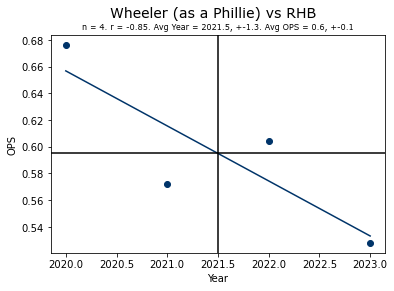

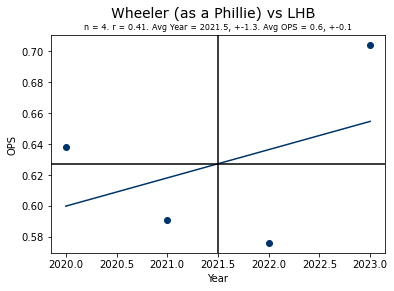

In [73]:
df = pitch_mix(ppsw[(ppsw.game_year == 2023)
                    &(ppsw.stand == 'R')
                    #&(ppsw.pitch_type.isin(['FF','SI','ST']))
                   ]
              )
df[df.pitch_type.isin(['FF','SI','ST'])].usage.sum() 
# 92.6% of Wheeler's pitches to RHB in 2023 were either Fastballs or Sweepers

# RHB Results were Down in 2023 relative to historical performance
df = ppsw[ppsw.stand == 'R']
rhb_results = results('game_year')

gg = rhb_results
x = gg.game_year
y = gg.ops
title = 'Wheeler (as a Phillie) vs RHB'
subtitle = 'OPS by Game Year'
xlabel = 'Year'
ylabel = 'OPS'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

df = ppsw[ppsw.stand == 'L']
lhb_results = results('game_year')

gg = lhb_results
x = gg.game_year
y = gg.ops
title = 'Wheeler (as a Phillie) vs LHB'
subtitle = 'OPS by Game Year'
xlabel = 'Year'
ylabel = 'OPS'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

Wheeler saw a big jump in LHB OPS last year, he has been getting hit harder by lefties in his time with the Phillies.

However, Wheeler is mowing down right-handed batters and has been trending down. Let's see the average location of the pitches that he throws to RHB. We know, in 2023, they were mostly fastballs and sweepers.

In [74]:
rhb = rhb_pitch_mix = pitch_mix(df[df.stand == 'R'])
lhb = lhb_pitch_mix = pitch_mix(df[df.stand == 'L'])

In [75]:
rhb.round(2)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage


In [76]:
df = rhb


In [77]:
# Ok I guess just Wheeler 2017 - 2023?
# Phillies Career Average could be a comparison here?
pitch_mix(ppsw[ppsw.game_year != 2023])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,3036,96.725198,2386.083361,7.640316,42.6
2,FC,Cutter,1694,91.055195,2426.864737,10.037780,23.8
5,SI,Sinker,1328,96.250602,2211.229669,8.627259,18.6
1,CU,Curveball,814,81.354177,2643.723587,10.869779,11.4
0,CH,Changeup,225,90.218667,1645.382222,10.920000,3.2
4,FS,Split-Finger,27,90.088889,1202.037037,11.000000,0.4


In [78]:
pitch_mix(ppsw[ppsw.game_year == 2023])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,1576,95.824810,2495.564721,7.387690,44.3
4,SI,Sinker,627,95.178150,2313.667737,9.020734,17.6
2,FC,Cutter,475,90.850526,2572.605932,8.774737,13.4
6,ST,Sweeper,468,84.245940,2647.646681,11.066239,13.2
1,CU,Curveball,397,81.375567,2751.065657,11.831234,11.2
0,CH,Changeup,13,90.753846,1796.384615,11.076923,0.4
5,SL,Slider,1,85.600000,2689.000000,14.000000,0.0


In [79]:
# df['bs_count'] = df['balls'].astype(str) + ' - ' + df['strikes'].astype(str)

# results_by_count = results('bs_count')

# pitches_by_count = df.groupby('bs_count',as_index=False).agg({'description' : 'count'})

In [80]:
# df = pitches_by_count.merge(results_by_count, left_on = 'description', right_on = 'pitches')

In [81]:
# df[['bs_count'
#     ,'bip'
#     ,'hits'
#     ,'hrs'
#    ]
#   ].sort_values(by='hrs',ascending=False)

### Whit Merrifield

In [82]:
df = whit = pd.read_csv('whit_np.csv')

In [83]:
df = gidp = whit_gidp = df[df.events == 'grounded_into_double_play']

In [84]:
df.groupby(['pitch_type'
            ,'p_throws'
            ,'game_year'
           ],as_index=False).agg({'release_speed' : 'mean'
                                  ,'release_spin_rate' : 'mean'
                                  ,'zone' : 'mean'
                                  ,'launch_angle' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'des' : 'count'
                                 }
                                ).round(2).sort_values(by=['game_year'
                                                           ,'p_throws'
                                                          ],ascending=False)

,pitch_type,p_throws,game_year,release_speed,release_spin_rate,zone,launch_angle,launch_speed,des
27,FF,R,2023,94.20,2374.67,8.00,-13.00,92.40,3
37,SI,R,2023,94.34,2227.00,7.29,-11.71,80.81,7
47,SL,R,2023,80.25,2398.50,3.50,-3.00,71.80,2
4,CH,L,2023,86.40,1586.00,14.00,1.00,67.10,1
32,SI,L,2023,90.30,1799.50,11.50,-4.00,80.95,2
8,CH,R,2022,86.90,1569.00,13.00,6.00,99.20,1
19,FC,R,2022,87.80,2317.00,9.00,3.00,72.30,1
26,FF,R,2022,95.57,2258.00,5.67,-2.67,84.23,3
46,SL,R,2022,87.15,2477.00,6.50,4.50,76.30,2
3,CH,L,2022,85.50,1438.00,9.00,-19.00,92.90,1


In [85]:
whit_gidp.launch_speed.mean().round(2)

83.06

In [86]:
df = pos
df = gidp = df[df.events == 'grounded_into_double_play']

In [87]:
gidp.groupby('player_name', as_index=False).filter(lambda x : len(x) > 5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
65,FF,2015-10-04,92.3,2.94,6.19,"Blanco, Andrés",433217,543045,grounded_into_double_play,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
214,FF,2015-10-03,87.2,2.48,6.40,"Rupp, Cameron",519237,592593,grounded_into_double_play,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
302,KC,2015-10-03,78.2,-1.42,6.47,"Ruf, Darin",573131,543408,grounded_into_double_play,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
818,SI,2015-09-27,93.0,2.26,5.45,"Rupp, Cameron",519237,461829,grounded_into_double_play,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
896,CH,2015-09-27,78.8,-3.12,6.18,"Blanco, Andrés",433217,450729,grounded_into_double_play,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202826,SI,2023-10-19,92.0,-3.25,3.46,"Stott, Bryson",681082,657044,grounded_into_double_play,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203035,SL,2023-10-16,87.9,-2.98,5.88,"Realmuto, J.T.",592663,668678,grounded_into_double_play,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203148,FF,2023-10-12,97.2,-1.85,5.84,"Bohm, Alec",664761,675911,grounded_into_double_play,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203342,SL,2023-10-11,90.4,-1.24,5.98,"Harper, Bryce",547180,678226,grounded_into_double_play,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


In [88]:
gidp.groupby('player_name', as_index=False).agg({'des' : 'count'
                                                 ,'launch_speed' : 'mean'
                                                }
                                               ).round(2).sort_values(by=['des','launch_speed'],ascending=False).head(25)

,player_name,des,launch_speed
23,"Franco, Maikel",71,86.10
7,"Bohm, Alec",59,91.13
33,"Harper, Bryce",54,90.41
75,"Segura, Jean",49,88.86
38,"Herrera, Odúbel",45,89.39
39,"Hoskins, Rhys",44,86.91
64,"Realmuto, J.T.",42,90.49
37,"Hernández, César",41,87.00
25,"Galvis, Freddy",40,88.43
15,"Castellanos, Nick",34,90.10


In [89]:
batters = ['Harper, Bryce','Howard, Ryan']

gidp[gidp.player_name.isin(batters)].groupby('player_name', as_index=False).agg({'launch_speed' : 'mean'
                                                                                  ,'des' : 'count'
                                                                                 }).dropna().sort_values(by='launch_speed'
                                                                                                         ,ascending=False)

,player_name,launch_speed,des
0,"Harper, Bryce",90.412963,54
1,"Howard, Ryan",84.988889,18


In [90]:
gidp.groupby('game_year', as_index=False).agg({'des' : 'count'
                                                 ,'launch_speed' : 'mean'
                                                }
                                               ).round(2).sort_values(by=['des','launch_speed'],ascending=False)#.head(25)

,game_year,des,launch_speed
2,2017,128,86.92
7,2022,126,88.97
0,2015,119,84.88
8,2023,117,89.58
1,2016,112,88.50
6,2021,103,87.13
3,2018,102,88.25
4,2019,97,89.34
5,2020,40,90.32


### Bryce Harper

In [91]:
harper_phils = phils_sc[phils_sc.player_name == 'Harper, Bryce']
harper_np = pd.read_csv('harper_np.csv')
harper = pd.concat([harper_phils,harper_np])
df = harper_phils[harper_phils.game_year == 2023]

In [92]:
df = bip = df[df.type == 'X']

In [93]:
df = hits = df[df.events.isin(['double','home_run','single','triple'])]

In [94]:
print('Percent of BIP that are hits:',round(len(hits)/len(bip),3)*100,'%')

Percent of BIP that are hits: 39.1 %


In [95]:
hits[['game_date','inning','launch_speed','launch_angle','events']].sort_values(by= 'launch_speed').head(5)

,game_date,inning,launch_speed,launch_angle,events
372556,2023-05-25,7,34.5,-4.0,single
356213,2023-09-27,5,54.5,12.0,double
372989,2023-05-22,1,56.6,-54.0,single
368686,2023-06-23,1,66.1,38.0,single
363606,2023-08-03,4,66.1,28.0,single


In [96]:
df = harper
results_by_year = results('game_year').merge(harper.groupby('game_year',as_index=False
                                                           ).agg({'description' : 'count'})
                                             ,left_on='pitches'
                                             ,right_on='description')
df = results_by_year

In [97]:
df['pitches_per_pa'] = df.pitches / df.plate_apps
df['hits_per_bip'] = df.hits / df.bip
df['hrs_per_pa'] = df.hrs / df.plate_apps
df['hrs_per_bip'] = df.hrs / df.bip

In [98]:
df[[#'game_year'
    'pitches'
    ,'plate_apps'
    ,'bip'
    ,'hits'
    ,'hrs'
    ,'pitches_per_pa'
    ,'hits_per_bip'
    ,'hrs_per_pa'
    ,'hrs_per_bip'
   ]
  ].round(3)

,pitches,plate_apps,bip,hits,hrs,pitches_per_pa,hits_per_bip,hrs_per_pa,hrs_per_bip
0,2682,654,394,172,42,4.101,0.437,0.064,0.107
1,2663,651,410,127,24,4.091,0.310,0.037,0.059
2,2066,503,338,138,30,4.107,0.408,0.060,0.089
3,2877,681,390,137,34,4.225,0.351,0.050,0.087
4,2787,672,399,149,35,4.147,0.373,0.052,0.088
5,973,236,150,51,13,4.123,0.340,0.055,0.087
6,2401,585,360,151,35,4.104,0.419,0.060,0.097
7,1854,488,340,128,24,3.799,0.376,0.049,0.071
8,2250,591,373,146,26,3.807,0.391,0.044,0.070


In [99]:
df = harper
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Harper, Bryce",20553,5061,3154,1199,263,716,1114,0.284,0.386,0.541,0.927,0.199


In [100]:
harper_career_hrs = 306
hrs_to_go = 500 - harper_career_hrs

In [101]:
hrs_to_go*9/263

6.638783269961977

In [102]:
df = harper[harper.game_year != 2020]

In [103]:
194/30

6.466666666666667

In [104]:
len(df[df.events == 'home_run'])/8

31.25

#### 500th HR in 2032

#### Defense

In [105]:
# Load Up All This Shit

In [106]:
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})

In [107]:
first_base = pps.groupby('fielder_3',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [108]:
pitches_at_first = first_base.merge(batters, left_on = 'fielder_3', right_on= 'batter', suffixes = ('','_y'))

In [109]:
first_base_opps = pps[pps.hit_location == 3]

In [110]:
# Snoop knew. Shit. You wanna risk it on this? You ready to bet your future on that?

In [111]:
df = pitches_at_first

In [112]:
harper_id = df[df.player_name == 'Harper, Bryce'].batter.unique().tolist()[0]

In [113]:
df = first_base_opps[first_base_opps.fielder_3 == harper_id]

In [114]:
# Column Selection
df = df[['game_date'
    ,'events'
    ,'pitch_type'
    ,'stand'
    ,'p_throws'
    ##,'pitcher'
    ,'release_speed'
    ,'release_spin_rate'
    ,'zone'
    ,'launch_speed'
    ,'launch_angle'
    ,'launch_speed_angle'
    ,'estimated_ba_using_speedangle'
    #,
   ]
  ]

In [115]:
df.groupby('events',as_index=False).agg({'stand' : 'count'})

,events,stand
0,double_play,2
1,field_out,74
2,fielders_choice,1
3,force_out,1
4,grounded_into_double_play,1
5,sac_bunt,1
6,single,5


In [116]:
df[df.events == 'force_out']

,game_date,events,pitch_type,stand,p_throws,release_speed,release_spin_rate,zone,launch_speed,launch_angle,launch_speed_angle,estimated_ba_using_speedangle
202837,2023-10-04,force_out,CH,L,R,86.2,1609.0,7.0,64.1,-29.0,2.0,0.051


In [117]:
df[df.events.isin(['double_play','grounded_into_double_play'])]

,game_date,events,pitch_type,stand,p_throws,release_speed,release_spin_rate,zone,launch_speed,launch_angle,launch_speed_angle,estimated_ba_using_speedangle
182031,2023-08-30,grounded_into_double_play,SI,L,L,92.1,2004.0,9.0,105.7,-20.0,2.0,0.194
184793,2023-08-08,double_play,SL,R,R,87.0,2563.0,14.0,67.1,10.0,2.0,0.260
186774,2023-07-23,double_play,SI,R,R,91.8,2358.0,5.0,93.9,8.0,4.0,0.609


In [118]:
df[df.events == 'fielders_choice']

,game_date,events,pitch_type,stand,p_throws,release_speed,release_spin_rate,zone,launch_speed,launch_angle,launch_speed_angle,estimated_ba_using_speedangle
186072,2023-07-29,fielders_choice,SI,R,R,93.9,2330.0,5.0,99.5,-12.0,2.0,0.257


I am struggling to benchmark the performance. I thought there definitely were some mistakes. But his OAA was good. So Instead I am diverting down the 9th inning of that August 8th game. Rojas great catch in center, Ortiz lets a guy on. Then mighty fine double play by Bryce Harper.

In [119]:
df = pps[(pps.game_date == '2023-08-08')
    &(pps.inning == 9)
    &(pps.player_name == 'Ortiz, Luis F.')
   ][['pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'type'
      ,'events'
      ,'estimated_ba_using_speedangle'
      #,'at_bat_number'
      #,'pitch_number'
      #,'pitch_sequence'
     ]
    ]

In [120]:
x.dropna(), y.dropna()

(0    2020
 1    2021
 2    2022
 3    2023
 Name: game_year, dtype: int64,
 0    0.638
 1    0.591
 2    0.576
 3    0.704
 Name: ops, dtype: float64)

In [121]:
df = bip = df[df.type == 'X']

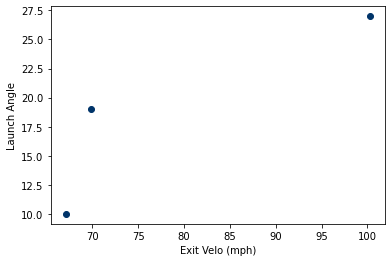

In [122]:
x = df.launch_speed
y = df.launch_angle
title = 'Launch Angle vs Exit Velo'
xlabel = 'Exit Velo (mph)'
ylabel = 'Launch Angle'
df.pitch_type
plt.scatter(x,y, c = colors)
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel)
plt.show()

### Rhys Hoskins

In [123]:
hoskins_id = batters[batters.player_name == 'Hoskins, Rhys'].batter.tolist()[0]

In [124]:
df = first_base_opps[first_base_opps.fielder_3 == hoskins_id]

In [125]:
mcgs('events', df).sort_values(by='pitches',ascending=False)

,events,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
3,field_out,777,777,777.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,777,0.148048,0.138101,0.0,0.0,0.0,0.0,0.0,0.000000
6,force_out,39,39,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,39,0.161128,0.153795,0.0,0.0,0.0,0.0,0.0,0.000000
9,single,34,34,34.0,34.0,34.0,0.0,0.0,0.0,0.0,...,0.0,34,0.280242,0.261606,0.0,1.0,1.0,1.0,2.0,0.878559
2,field_error,23,23,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23,0.194696,0.182870,0.0,0.0,0.0,0.0,0.0,0.000000
8,sac_bunt,20,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20,0.224286,0.210714,0.0,NaN,0.0,NaN,NaN,0.000000
7,grounded_into_double_play,18,18,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18,0.199333,0.186222,0.0,0.0,0.0,0.0,0.0,0.000000
5,fielders_choice_out,8,8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8,0.218286,0.210143,0.0,0.0,0.0,0.0,0.0,0.000000
1,double_play,7,7,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7,0.449000,0.417571,0.0,0.0,0.0,0.0,0.0,0.000000
4,fielders_choice,5,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5,0.124400,0.119200,0.0,0.0,0.0,0.0,0.0,0.000000
0,double,4,4,4.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4,0.347250,0.325000,0.0,1.0,1.0,2.0,3.0,1.229500


In [126]:
outs = ['field_out'
        ,'strikeout'
        ,'force_out'
        ,'grounded_into_double_play'
        ,'sac_fly'
        ,'sac_bunt'
        ,'double_play'
        ,'fielders_choice_out'
        ,'caught_stealing_2b'
        ,'caught_stealing_2b'
        ,'strikeout_double_play'
        ,'caught_stealing_home'
        ,'other_out'
        ,'sac_fly_double_play'
        ,'pickoff_1b'
        ,'triple_play'
        ,'caught_stealing_3b'
        ,'sac_bunt_double_play'
        ,'pickoff_caught_stealing_2b'
        ,'pickoff_2b'
        ,'catcher_interf'
       ]

In [127]:
mcgs('events', pps).sort_values(by='pitches', ascending=False).iloc[:,0:2]

,events,pitches
7,field_out,20559
24,strikeout,11723
23,single,7738
28,walk,3974
4,double,2407
13,home_run,1694
10,force_out,1026
11,grounded_into_double_play,983
12,hit_by_pitch,543
6,field_error,383


In [128]:
df.dropna(subset='estimated_ba_using_speedangle')[['game_date'
                                                   ,'pitch_type'
                                                   ,'release_speed'
                                                   ,'release_spin_rate'
                                                   ,'player_name'
                                                   ,'pitcher'
                                                   ,'batter'
                                                   ,'launch_speed'
                                                   ,'launch_angle'
                                                   ,'hit_distance_sc'
                                                   ,'zone'
                                                   ,'inning'
                                                   ,'events'
                                                   ,'estimated_ba_using_speedangle'
                                                  ]
                                                 ].sort_values(by= 'estimated_ba_using_speedangle',ascending=False).head(5)

,game_date,pitch_type,release_speed,release_spin_rate,player_name,pitcher,batter,launch_speed,launch_angle,hit_distance_sc,zone,inning,events,estimated_ba_using_speedangle
151083,2021-04-09,CH,86.1,2161.0,"Kintzler, Brandon",445213,518692,96.8,11.0,160.0,7.0,6,field_out,0.880
148449,2021-04-30,FF,93.0,2088.0,"Anderson, Chase",502624,596019,103.8,10.0,161.0,9.0,1,field_out,0.820
97413,2019-09-17,SI,91.9,2020.0,"Hughes, Jared",453172,542364,105.6,9.0,154.0,5.0,6,field_out,0.787
153619,2022-09-24,FC,87.6,2288.0,"Brogdon, Connor",641401,543257,92.4,11.0,156.0,5.0,6,field_out,0.777
96895,2019-09-21,SI,90.3,1823.0,"Hughes, Jared",453172,596019,111.4,8.0,161.0,7.0,7,field_out,0.767


In [129]:
df = first_base_opps[first_base_opps.fielder_3 == harper_id]
df.dropna(subset='estimated_ba_using_speedangle')[['game_date'
                                                   ,'pitch_type'
                                                   ,'release_speed'
                                                   ,'release_spin_rate'
                                                   ,'player_name'
                                                   ,'pitcher'
                                                   ,'batter'
                                                   ,'launch_speed'
                                                   ,'launch_angle'
                                                   ,'hit_distance_sc'
                                                   ,'zone'
                                                   ,'inning'
                                                   ,'events'
                                                   ,'estimated_ba_using_speedangle'
                                                  ]
                                                 ].sort_values(by= 'estimated_ba_using_speedangle',ascending=False).head(5)

,game_date,pitch_type,release_speed,release_spin_rate,player_name,pitcher,batter,launch_speed,launch_angle,hit_distance_sc,zone,inning,events,estimated_ba_using_speedangle
178017,2023-09-30,CU,79.7,2746.0,"Ortiz, Luis F.",656814,596019,104.4,6.0,106.0,4.0,8,single,0.669
186774,2023-07-23,SI,91.8,2358.0,"Nola, Aaron",605400,671289,93.9,8.0,151.0,5.0,5,double_play,0.609
202753,2023-10-07,FF,95.3,2381.0,"Kimbrel, Craig",518886,671739,102.5,3.0,77.0,6.0,9,field_out,0.577
186789,2023-07-23,KC,78.2,2423.0,"Nola, Aaron",605400,605137,96.6,5.0,92.0,14.0,4,field_out,0.574
184554,2023-08-09,SL,82.6,2460.0,"Lorenzen, Michael",547179,660688,101.8,2.0,60.0,8.0,7,field_out,0.543


### Edmundo Sosa

Let us see all the opportunities he had this year

In [130]:
sosa_id = batters[batters.player_name == 'Sosa, Edmundo'].batter.tolist()[0]
df = pps[((pps.fielder_5 == sosa_id) & (pps.hit_location == 5))
         |((pps.fielder_6 == sosa_id) & (pps.hit_location == 6))
         |((pps.fielder_4 == sosa_id) & (pps.hit_location == 4))
        ]

sosa_opps = df

In [131]:
sosa_opps.groupby(['hit_location'
                   ,'game_year'],as_index=False
                 ).agg({'des' : 'count'
                       }
                      ).sort_values(by='des',ascending=False)

,hit_location,game_year,des
2,5.0,2023,213
3,6.0,2022,41
1,5.0,2022,36
4,6.0,2023,34
0,4.0,2023,9


In [132]:
df.dropna(subset='estimated_ba_using_speedangle')[['game_date'
                                                   ,'pitch_type'
                                                   ,'hit_location'
                                                   ,'release_speed'
                                                   ,'release_spin_rate'
                                                   ,'player_name'
                                                   ,'pitcher'
                                                   ,'batter'
                                                   ,'launch_speed'
                                                   ,'launch_angle'
                                                   ,'hit_distance_sc'
                                                   ,'zone'
                                                   ,'inning'
                                                   ,'events'
                                                   ,'estimated_ba_using_speedangle'
                                                  ]
                                                 ].sort_values(by= 'estimated_ba_using_speedangle',ascending=False).head(5)

,game_date,pitch_type,hit_location,release_speed,release_spin_rate,player_name,pitcher,batter,launch_speed,launch_angle,hit_distance_sc,zone,inning,events,estimated_ba_using_speedangle
155797,2022-09-06,CH,6.0,85.9,1422.0,"Nola, Aaron",605400,668709,72.4,22.0,175.0,7.0,4,field_out,0.940
189299,2023-07-01,SL,6.0,80.3,2511.0,"Vasquez, Andrew",607755,642086,99.3,12.0,193.0,4.0,6,field_out,0.934
175850,2022-10-29,SI,6.0,93.9,2404.0,"Wheeler, Zack",554430,665161,74.9,18.0,168.0,4.0,2,field_out,0.877
198214,2023-04-21,FC,5.0,95.5,2176.0,"Alvarado, José",621237,543068,111.6,9.0,171.0,7.0,9,field_out,0.857
181257,2023-09-05,FF,6.0,95.7,2535.0,"Lorenzen, Michael",547179,673490,94.7,11.0,183.0,5.0,3,field_out,0.849


In [133]:
df = sosa_gidp = df[df.events == 'grounded_into_double_play']

In [134]:
df.dropna(subset='estimated_ba_using_speedangle')[['game_date'
                                                   ,'pitch_type'
                                                   ,'hit_location'
                                                   ,'release_speed'
                                                   ,'release_spin_rate'
                                                   ,'player_name'
                                                   ,'pitcher'
                                                   ,'batter'
                                                   ,'launch_speed'
                                                   ,'launch_angle'
                                                   ,'hit_distance_sc'
                                                   ,'zone'
                                                   ,'inning'
                                                   ,'events'
                                                   ,'estimated_ba_using_speedangle'
                                                  ]
                                                 ].sort_values(by= 'estimated_ba_using_speedangle',ascending=False).head(5)

,game_date,pitch_type,hit_location,release_speed,release_spin_rate,player_name,pitcher,batter,launch_speed,launch_angle,hit_distance_sc,zone,inning,events,estimated_ba_using_speedangle
175839,2022-10-29,FF,6.0,96.2,2492.0,"Wheeler, Zack",554430,608324,98.2,4.0,195.0,11.0,3,grounded_into_double_play,0.554
193474,2023-05-28,SL,5.0,86.5,2771.0,"Hoffman, Jeff",656546,669221,84.5,6.0,88.0,9.0,2,grounded_into_double_play,0.400
200388,2023-04-05,SI,5.0,87.2,2002.0,"Nola, Aaron",605400,624431,94.5,-1.0,45.0,11.0,5,grounded_into_double_play,0.346
159582,2022-08-09,SI,6.0,98.8,2310.0,"Domínguez, Seranthony",622554,607732,100.0,-3.0,29.0,5.0,9,grounded_into_double_play,0.340
178132,2023-09-28,FF,4.0,96.4,2573.0,"Hoffman, Jeff",656546,641511,98.7,-13.0,10.0,5.0,8,grounded_into_double_play,0.229


Based on the tape, Edmundo is a nice defender.

### Bryson Stott

In [135]:
# Maybe some day, but not right now.

### Jackin Taters Realmuto

In [136]:
jt_id = pos[pos.player_name == 'Realmuto, J.T.'].batter.unique().tolist()[0]

In [137]:
jt_def = pps[pps.fielder_2 == jt_id]

In [138]:
jt = jt_off = pos[pos.batter == jt_id]

In [139]:
df = jt
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2019,2332,592,423,148,25,39,123,0.274,0.324,0.491,0.815,0.339
1,2020,742,195,125,46,11,16,48,0.266,0.349,0.491,0.840,0.361
2,2021,2096,533,349,125,17,43,129,0.262,0.336,0.438,0.774,0.335
3,2022,2476,634,431,153,25,46,143,0.268,0.334,0.465,0.799,0.347
4,2023,2297,589,392,136,23,33,151,0.251,0.304,0.457,0.760,0.324


#### Nola Pitching to JT

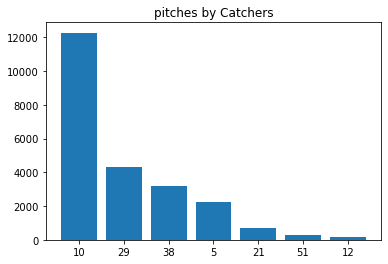

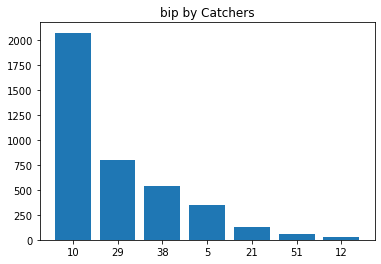

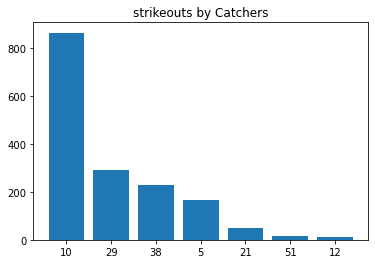

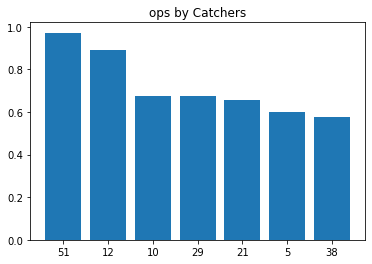

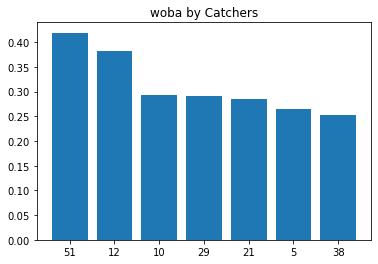

In [140]:
nola_id = pps[pps.player_name == 'Nola, Aaron'].pitcher.unique().tolist()[0]
jt_def_nola = jt_def[jt_def.pitcher == nola_id]
nola = pps[pps.pitcher == nola_id]

df = nola[nola.fielder_2 != jt_id]
nola2else = results('player_name')

df = jt_def_nola
nola2jt = results('player_name')

nola2else

nola2jt

df = nola
catchers = results('fielder_2')

catcher_ids = pps.fielder_2.unique().tolist()
roster_2s = pos[pos.batter.isin(catcher_ids)][['player_name'
                                              ,'batter']].groupby('player_name',as_index=False).agg({'batter' : 'max'})

catchers = catchers.merge(roster_2s, left_on = 'fielder_2', right_on = 'batter', suffixes = ('','_2s'))

catchers['number'] = ['51', '29', '10', '5', '38', '21', '12']

viz = catchers[['player_name'
                ,'number'
                ,'pitches'
                ,'bip'
                ,'strikeouts'
                ,'ops'
                ,'woba'
               ]
              ]#.sort_values(by='pitches',ascending=False)

# Nola Pitching To His Catchers
for c in viz.columns[2:]:
    x = viz.sort_values(by=c,ascending=False)['number']
    y = viz.sort_values(by=c,ascending=False)[c]
    plt.bar(x,y)
    plt.title('{} by Catchers'.format(c))
    plt.show()

In [141]:
# I need to show this in another way, so I am going to connect to the nola by year data to get my expected stuff from Statcast Search.

In [142]:
# I need to use SYMPHONY in the same way.

In [143]:
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola_23 = nola[nola.game_year == 2023]
df = front_hip_sinker = nola[(nola.zone.isin([3,6,9]))
                             &(nola.pitch_type == 'SI')
                             &(nola.stand == 'L')
                            ]
                             #front_hip_sinker(df)

Start with some QA work to validate this data makes sense.
<br>I am going to check off some expected descriptions of the dataset.
<br>These sorts of inputs could be fed into the more advanced tools.
<br>I am generating my own insights - then I am going to make my voice the loudest!!!!

In [144]:
# Nola to Catchers - There should be multiple
# Pitcher Id - There should only be one, Aaron Nola
# player_name - this too should only be one, Nola, Aaron
# game_year - 2023
games = len(df.game_pk.unique()) # the Number of Games in Which Aaron Nola has thrown a Front Hip Sinker
# games - This is not necessarily the number of games Nola pitcched in, it has other restrictions
# pitch_type - 'SI'
# pitch_name - 'Sinker'
# stand - ['L','R'] 
# release_speed - array of velocities as type float64
# release_spin_rate - array of spin rates as type float64
# release_x - 
# release_y 
# zone - [1,3,4,6,7,9] Only pitches in these zones would be defined as front hip sinkers
# so if it breaks all the way back to zone 5 it would not be called a front hip sinker

# So now I have found a QA fix.

In [145]:
def lhb_zones():
    up_away = zha = l_ha = 1 
    up = zhc = l_ha = 2
    up_in = zhi = l_ha = 3
    middle_away = zma = l_ha = 4
    middle_middle = zmc = l_ha = 5
    middle_in = zmi = 6
    low_away = zla = l_ha = 7 
    down = zlc = l_ha = 8 
    down_in = zli = l_ha = 9
    return up_away, up, up_in, middle_away, middle_middle, middle_in, low_away, down, down_in 

# lhb_zones = [zha,zhc,zhi ## 1, 2, 3
#             ,zma,zmc,zmi ## 4, 5, 6
#             ,zla,zlc,zli ## 7, 8, 9
#             ]

up_away, up, up_in, middle_away, middle_middle, middle_in, low_away, down, down_in = lhb_zones()

nola[(nola.pitch_type == 'SI')
     &(nola.zone.isin([up_in,middle_in,down_in]))
    ]#[['pitch_name']]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
1072,SI,2015-09-26,93.0,-2.49,4.98,"Nola, Aaron",150029,605400,NaN,called_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
1155,SI,2015-09-26,92.6,-2.72,5.06,"Nola, Aaron",150029,605400,NaN,called_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
1194,SI,2015-09-26,93.7,-2.59,5.09,"Nola, Aaron",543685,605400,field_out,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
2412,SI,2015-09-14,90.7,-2.68,5.13,"Nola, Aaron",572191,605400,NaN,called_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
2495,SI,2015-09-14,91.7,-2.64,5.11,"Nola, Aaron",519208,605400,field_out,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202111,SI,2023-10-17,92.6,-1.82,5.21,"Nola, Aaron",502054,605400,strikeout,called_strike,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
202463,SI,2023-10-11,93.2,-1.86,5.15,"Nola, Aaron",663586,605400,field_out,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
202846,SI,2023-10-04,90.5,-1.95,5.08,"Nola, Aaron",607732,605400,grounded_into_double_play,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
202863,SI,2023-10-04,93.2,-1.79,5.07,"Nola, Aaron",669394,605400,single,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


I also found this interesting hypothetical:

Hypothetical scenario, what about the two seamers that have such much friggin run on them, they come all the way from my butt cheek to the middle of the plate. I can catch those with a different filter.

In [146]:
df.groupby('zone',as_index=False).agg({'description':'count'
                                       #,'pitch_number' : 'nunique'
                                       #,'release_speed' : 'mean'
                                       #,'release_spin_rate' : 'mean'
                                       #,'release_x' : 'nunique'
                                       ,'stand' : 'max'
                                      })

,zone,description,stand
0,3.0,153,L
1,6.0,172,L
2,9.0,72,L


In [147]:
# And with a look at the Statcast Zone numbering Visual
# Need a multi figure plot here to show these

In [148]:
def zones(df):
    x = df.groupby('zone',as_index=False).agg({'des' : 'count'
                                               ,'pitcher' : 'nunique' # Just nola_id
                                               ,'pitch_type' : 'nunique' # Just SI
                                               ,'pitch_number' : 'nunique' # Point in Count
                                               ,'game_pk' : 'nunique' # Unique games in which he threw this pitch
                                               ,'game_date' : 'nunique'# Unique game dates in which he threw this pitch
                                               ,'release_speed' : 'mean' # Mean velo of this pitch
                                               ,'release_spin_rate' : 'mean' # Mean spin of the pitch
                                               #,'release_x' : 'unique'
                                               ,'plate_x' : 'mean' # Mean plate_x of the pitch
                                               ,'pitch_name' : 'nunique' # Just Sinker
                                               ,'stand' : 'nunique' # This is just One at the Zone level
                                               ,'p_throws' : 'count' # Number of pitches
                                              }
                                             ).round(1)
    return x

In [149]:
fielder_2 = jt_id = jt_def.fielder_2.unique().tolist()[0]
nola2all = zones(nola[nola.fielder_2 != fielder_2])
nola2jt = zones(nola[nola.fielder_2 == fielder_2]) 
all2jt = zones(jt_def[jt_def.fielder_2 == fielder_2])

In [150]:
#Next step is to find the difference between these groups (Immediate Context)
#graph(nola2all,all2jt)
nola2all

,zone,des,pitcher,pitch_type,pitch_number,game_pk,game_date,release_speed,release_spin_rate,plate_x,pitch_name,stand,p_throws
0,1.0,312,1,5,10,107,107,88.4,2153.3,-0.5,5,2,312
1,2.0,391,1,6,9,108,108,90.1,2142.0,0.0,6,2,391
2,3.0,285,1,6,9,100,100,91.2,2123.3,0.5,6,2,285
3,4.0,749,1,6,10,114,114,85.8,2119.3,-0.5,6,2,749
4,5.0,773,1,6,9,114,114,86.5,2158.8,-0.0,6,2,773
5,6.0,620,1,6,9,115,115,88.4,2192.1,0.5,6,2,620
6,7.0,734,1,6,11,115,115,85.3,1996.7,-0.5,6,2,734
7,8.0,810,1,5,9,115,115,84.5,2129.1,-0.0,5,2,810
8,9.0,772,1,6,10,114,114,85.2,2245.9,0.5,6,2,772
9,11.0,1155,1,7,11,114,114,87.8,2069.5,-1.2,7,2,1155


In [151]:
# Next step is to create a YOY graph of these differences (Historical Context)

In [152]:
for c in df.columns[10:20]:
    print(c)

spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team


##### Does Nola Throw a Different Number of Front Hip Sinkeres to JT Realmuto vs Other Catchers?

In [153]:
def front_hip_sinker(df):
    lefties = df[(df.zone.isin([1,4,7]))
                 &(df.pitch_type == 'SI')
                 #&(df.pitch_location == )
                 &(df.stand == 'L')
                ]
    righties = df[(df.zone.isin([3,6,9]))
                   &(df.pitch_type == 'SI')
                   &(df.stand == 'R')
                 ]
    fhs = pd.concat([lefties, righties])
    return fhs

fhs = front_hip_sinker(nola)

In [154]:
df = front_hip_sinker(nola)
game_years = results('game_year')
fielder_2s = results('fielder_2')
zones = results('zone')

In [155]:
def pitch_mix_by_season_and_stand(df):
    pitch_mix_by_season = pd.DataFrame()
    for y in df.game_year.unique().tolist():
        #for s in df.stand.unique().tolist():
        mbs = pitch_mix(df[(df.game_year == y)
                               ]
                            )
        pmbs['year'] = y
        #pmbs['stand'] = s
        pitch_mix_by_season = pd.concat([pitch_mix_by_season, pmbs])
            
    return pitch_mix_by_season
#pitch_mix_by_season(df)

pitch_mix(nola) # So Nola only throws A Sinker 20% of the time

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,7293,92.675113,2190.476800,8.279583,31.5
5,KC,Knuckle Curve,6115,78.596877,2563.100164,10.007522,26.4
7,SI,Sinker,4501,91.555810,2105.477263,8.712731,19.5
0,CH,Changeup,3810,85.051102,1504.202845,10.528609,16.5
1,CU,Curveball,875,76.855200,2516.937136,10.142857,3.8
2,FC,Cutter,521,86.626488,2237.621881,9.644914,2.3
4,IN,Intentional Ball,11,74.663636,1747.090909,11.090909,0.0
6,PO,Pitch Out,2,85.400000,1978.000000,12.000000,0.0


In [156]:
df = nola
pitch_types = results('pitch_type')
df = pitch_types.merge(pitch_mix(nola)
                  ,left_on = 'pitch_type'
                  ,right_on = 'pitch_type'
                  ,suffixes = ('','_pm')
                 )

In [157]:
df.columns

Index(['pitch_type', 'pitches', 'plate_apps', 'bip', 'hits', 'hrs', 'walks',
       'strikeouts', 'ba', 'obp', 'slg', 'ops', 'woba', 'pitch_name', 'count',
       'release_speed', 'release_spin_rate', 'zone', 'usage'],
      dtype='object')

In [158]:
def pitch_profile(df):
    return df[['pitch_name'
                ,'pitches'
                ,'plate_apps'
                ,'hits'
                ,'bip'
                ,'hrs'
                ,'ops'
                ,'woba'
                ,'usage'
                ,'release_speed'
                ,'release_spin_rate'
               ]
              ].round(3
                     ).sort_values(by='pitches'
                                   ,ascending=False
                                  )

In [159]:
pitch_profile(df)

,pitch_name,pitches,plate_apps,hits,bip,hrs,ops,woba,usage,release_speed,release_spin_rate
3,4-Seam Fastball,7293,1575.0,335.0,1045.0,67.0,0.750,0.322,31.5,92.675,2190.477
5,Knuckle Curve,6115,1736.0,319.0,1010.0,46.0,0.562,0.242,26.4,78.597,2563.100
7,Sinker,4501,1296.0,313.0,922.0,31.0,0.715,0.311,19.5,91.556,2105.477
0,Changeup,3810,990.0,236.0,719.0,21.0,0.677,0.295,16.5,85.051,1504.203
1,Curveball,875,274.0,45.0,144.0,4.0,0.477,0.209,3.8,76.855,2516.937
2,Cutter,521,139.0,33.0,113.0,6.0,0.678,0.287,2.3,86.626,2237.622
4,Intentional Ball,11,4.0,0.0,0.0,0.0,NaN,0.000,0.0,74.664,1747.091
6,Pitch Out,2,0.0,0.0,0.0,0.0,NaN,NaN,0.0,85.400,1978.000


### Nola Curveballs at the top of the zone

In [160]:
import pandas as pd

def filter_dataframe(dataframe, **kwargs):
    """
    Filter a DataFrame based on key-value pairs in kwargs.

    Parameters:
    - dataframe: pandas DataFrame
    - **kwargs: Key-value pairs where keys are column names and values are the filter criteria.

    Returns:
    - pandas DataFrame: Filtered DataFrame
    """

    # Ensure that the input is a pandas DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    # Initialize a boolean mask with True values for all rows
    mask = pd.Series(True, index=dataframe.index)

    # Apply filters based on key-value pairs in kwargs
    for column, value in kwargs.items():
        if column not in dataframe.columns:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame")
        
        mask = mask & (dataframe[column] == value)

    # Apply the boolean mask to filter the DataFrame
    filtered_dataframe = dataframe[mask]

    return filtered_dataframe

# Example usage:
# Assuming you have a DataFrame called 'your_dataframe'
# filtered_result = filter_dataframe(your_dataframe, column1=value1, column2=value2, ...)


In [161]:
catchers = nola_catchers = pos[pos.batter.isin(nola.fielder_2.unique().tolist())].groupby('player_name',as_index=False
                                                                                         ).agg({'batter' : 'max'
                                                                                               }
                                                                                              )

In [162]:
catchers

,player_name,batter
0,"Alfaro, Jorge",595751
1,"Knapp, Andrew",595284
2,"Marchán, Rafael",665561
3,"Realmuto, J.T.",592663
4,"Ruiz, Carlos",434563
5,"Rupp, Cameron",519237
6,"Stubbs, Garrett",596117


In [163]:
df = filter_dataframe(nola
                        , pitch_type='SI'
                        , stand='L'
                        #, zone.isin([3,6,9])
                       )

fhs_catchers = results('fielder_2')
fhs_catchers.merge(catchers
                   ,left_on = 'fielder_2'
                   ,right_on = 'batter'
                  )

,fielder_2,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,player_name,batter
0,434563,91,25,15,7,0.0,4,5,0.350,0.480,0.400,0.880,0.400,"Ruiz, Carlos",434563
1,519237,667,200,158,54,8.0,17,24,0.298,0.355,0.503,0.858,0.365,"Rupp, Cameron",519237
2,592663,727,224,135,42,9.0,19,66,0.209,0.281,0.388,0.669,0.290,"Realmuto, J.T.",592663
3,595284,234,68,44,15,2.0,8,16,0.250,0.338,0.417,0.755,0.328,"Knapp, Andrew",595284
4,595751,286,82,52,12,1.0,12,18,0.171,0.293,0.257,0.550,0.257,"Alfaro, Jorge",595751
5,596117,75,30,18,5,0.0,1,11,0.172,0.200,0.241,0.441,0.195,"Stubbs, Garrett",596117
6,665561,21,8,4,1,0.0,1,3,0.143,0.250,0.286,0.536,0.242,"Marchán, Rafael",665561


In [164]:
df = nola_cu = pd.concat([nola[nola.pitch_type == 'KC'], nola[nola.pitch_type == 'CU']])

```sql
select case when pitch_type in ('KC', 'CU')
            then 'Curveball'
            else pitch_name
            end as pitch
from df
```

In [165]:
def pitch_mix_by_group(df, group):
    # Pitch Mix
    pm  = df.groupby([group], as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
    pm['usage'] = round((pm['count']/len(df))*100,1)
    return pm
#pitch_mix_by_group(nola, ['stand','pitch_type'])

In [166]:
df_cu = merge_cu(nola)
df_cu = df_cu[~df_cu.pitch_type.isin(['IN','PO'])]
pitch_mix(df_cu)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,7293,92.675113,2190.476800,8.279583,31.5
1,CU,Curveball,6990,78.378856,2557.410102,10.024464,30.2
4,SI,Sinker,4501,91.555810,2105.477263,8.712731,19.5
0,CH,Changeup,3810,85.051102,1504.202845,10.528609,16.5
2,FC,Cutter,521,86.626488,2237.621881,9.644914,2.3


In [167]:
pitch_mix(df)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,KC,Knuckle Curve,6115,78.596877,2563.100164,10.007522,87.5
0,CU,Curveball,875,76.855200,2516.937136,10.142857,12.5


#### JT vs His Guys

How does JT do against guys he has caught from? Well there are a lot of them out there. We will start by looking at the current Phillies pitching staff - how have they fared against J.T. Realmuto. (n = ~15 but some of those guys [Nola, Kerkering, Brogdon, Ranger...] are N/A)


Then we will come back later and look at all the guys JT has caught for the Phillies (n > 150) and how JT bashes against them later in their career.
Ex. Zach Eflin, Hector Neris, Tommy Hunter?, Brad Hand?, Jared Hughes.

In [168]:
# Use a groupby of pps to identify Phillies pitchers
wheels = pps[pps.pitcher == 554430] # Get Wheeler's pitches
wheels.groupby('fielder_2',as_index=False).agg({'des' : 'count'}) # Who is his most common catcher? Gotta be JT's ID

,fielder_2,des
0,592663,9181
1,595284,915
2,596117,491
3,665561,95


In [169]:
# Who threw a Pitch to <player> for the <game_year> Philadelphia Phillies
player = jt_id = 592663 # plug in JT id determined above.
game_year = 2023 # user input

df = pps[(pps.game_year == game_year)
    &(pps.fielder_2 == player)
   ].groupby(['player_name'
            ],as_index=False
           ).agg({'pitcher' : 'max'
                  #,'fielder_2' : ['min','max','mode']
                  ,'fielder_2' : 'mean'
                  ,'zone' : 'mean'
                 })

In [170]:
df # they all threw to JT in 2023
# so let's go look at how JT hits against these guys? It will include Kimbrel and Mike Lo
jt_vs_his_guys = pos[(pos.batter == jt_id) & (pos.pitcher.isin(df.pitcher))]

In [171]:
jt_vs_his_guys.groupby('pitcher',as_index=False).agg({'des' : 'count'
                                                      ,'game_pk' : 'nunique'}).merge(df, left_on ='pitcher', right_on = 'pitcher')

,pitcher,des,game_pk,player_name,fielder_2,zone
0,518886,6,1,"Kimbrel, Craig",592663.0,9.024793
1,547179,16,3,"Lorenzen, Michael",592663.0,9.072546
2,554430,40,4,"Wheeler, Zack",592663.0,8.818452
3,592229,3,1,"Covey, Dylan",592663.0,9.513453
4,592836,66,7,"Walker, Taijuan",592663.0,9.185689
5,642397,4,1,"Soto, Gregory",592663.0,9.040441


In [172]:
nphl[nphl.batter == jt_id].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                     }
                                                                    ).sort_values(by='des',ascending=False)


## Using the above code I decided to filter out player_name == 'Realmuto J.T.' via his jt_id
nphl[(nphl.batter == jt_id) & (nphl.player_name != 'Realmuto, J.T.')].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                                                                 ,'game_pk' : 'nunique'
                                                                     }
                                                                    ).sort_values(by='des',ascending=False)

jt_as_non_phillies_vs_his_phillies_guys = nphl[(nphl.batter == jt_id) & (nphl.player_name != 'Realmuto, J.T.')]

In [173]:
jt_as_non_phillies_vs_his_phillies_guys.agg({'game_year' : ['min','max']}) # It includes his guys with the Phils when they were non-Phils

,game_year
min,2015
max,2023


In [174]:
jt_as_non_phillies_vs_his_phillies_guys.player_name.unique().tolist()

['Allard, Kolby',
 'Alvarado, José',
 'Anderson, Chase',
 'Covey, Dylan',
 'Diekman, Jake',
 'Eflin, Zach',
 'De Los Santos, Enyel',
 'Giles, Ken',
 'Hamels, Cole',
 'Hand, Brad',
 'Hoffman, Jeff',
 'Kimbrel, Craig',
 'Moore, Matt',
 'Morton, Charlie',
 'Nelson, Nick',
 'Neris, Hector',
 'Ríos, Yacksel',
 'Soto, Gregory',
 'Strahm, Matt',
 'Turnbull, Spencer',
 'Walker, Taijuan',
 'Wheeler, Zack']

In [175]:
# Some of these guys are not his guys. So who are his guys?

In [176]:
# soy boy data cuck

In [177]:
his_guys = jt_as_non_phillies_vs_his_phillies_guys[jt_as_non_phillies_vs_his_phillies_guys.pitcher.isin(pps[pps.fielder_2 == jt_id].pitcher)]

his_guys_np = his_guys

In [178]:
his_guys_np.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                    ,'game_year' : 'max'
                                                    ,'game_pk' : 'nunique'})

,player_name,pitcher,game_year,game_pk
0,"Alvarado, José",621237,2018,2
1,"Anderson, Chase",502624,2020,4
2,"Covey, Dylan",592229,2019,1
3,"De Los Santos, Enyel",660853,2023,2
4,"Eflin, Zach",621107,2023,1
5,"Hand, Brad",543272,2023,11
6,"Hoffman, Jeff",656546,2018,2
7,"Kimbrel, Craig",518886,2022,6
8,"Moore, Matt",519043,2022,4
9,"Nelson, Nick",656793,2021,2


In [179]:
his_guys_pos = pos[(pos.batter == player)
                   &(pos.pitcher.isin(pps[pps.fielder_2 == player].pitcher))
                  ]

his_guys_pos

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
98031,SL,2019-09-04,86.8,-1.71,5.75,"Realmuto, J.T.",592663,547179,field_out,hit_into_play,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
98034,SL,2019-09-04,87.8,-1.66,5.78,"Realmuto, J.T.",592663,547179,NaN,ball,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
98035,FF,2019-09-04,98.2,-1.41,5.93,"Realmuto, J.T.",592663,547179,NaN,called_strike,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
98038,FF,2019-09-04,95.9,-1.50,5.94,"Realmuto, J.T.",592663,547179,NaN,ball,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
98632,SL,2019-08-31,88.3,-1.43,6.34,"Realmuto, J.T.",592663,544727,strikeout,swinging_strike,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203840,FC,2023-10-04,95.1,-2.64,6.00,"Realmuto, J.T.",592663,502085,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203846,FC,2023-10-04,94.7,-2.77,5.99,"Realmuto, J.T.",592663,502085,NaN,ball,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203852,FC,2023-10-04,95.5,-2.65,6.06,"Realmuto, J.T.",592663,502085,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203855,FC,2023-10-04,94.8,-2.69,5.98,"Realmuto, J.T.",592663,502085,NaN,called_strike,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


In [180]:
jt_against_his_guys = pd.concat([his_guys_pos, his_guys_np])

In [181]:
x = mcgs('batter',jt_against_his_guys)[['pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].round(3) # JT does pretty well against his guys

In [182]:
jt_phils = pos[pos.batter == jt_id]
y = mcgs('batter',jt_phils)[['pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].round(3) # Especially relative to how he has performed as the Phillies catcher these last 5 years.

In [183]:
# But what about relative to his whole stinkin' career?
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.']
                ,pos[pos.player_name == 'Realmuto, J.T.']
               ])

In [184]:
z = mcgs('game_year', jt)[['pitches'
                                    ,'plate_apps'
                           #,'games;
                                    ,'at_bats'
                                    ,'hits'
                           ,'doubles'
                           ,'triples'
                                    ,'ba'
                                    ,'hrs'
                           #,'rbi' # could calculate based on 
                           
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].round(3) # Considerably so relative to his whole career

In [185]:
#but what about just jt
w = mcgs('batter',jt)[['pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].round(3) # JT is slightly above his normal self with that sort of stuff

In [186]:
w # JT Realmuto (Career)

,pitches,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,592663,18021,4659,4260,1156,0.271,160,0.326,0.455,0.781,0.185,0.335,0.382


In [187]:
x # JT against his guys

,pitches,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,592663,873,220,199,58,0.291,6,0.35,0.477,0.827,0.209,0.336,0.395


In [188]:
y # JT as a Phillies player

,pitches,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,592663,9943,2543,2301,608,0.264,101,0.326,0.465,0.792,0.338,0.342,0.399


In [189]:
z # JT career by Year

,pitches,plate_apps,at_bats,hits,doubles,triples,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,1723,467,441,114,21,7.0,0.259,10,0.285,0.406,0.691,0.000,0.313,0.341
1,2142,545,509,154,31,0.0,0.303,11,0.341,0.428,0.770,0.000,0.320,0.341
2,2171,575,532,148,31,5.0,0.278,17,0.327,0.451,0.778,0.000,0.336,0.374
3,2042,529,477,132,30,3.0,0.277,21,0.340,0.484,0.825,0.000,0.336,0.394
4,2332,592,540,148,36,3.0,0.274,25,0.324,0.491,0.815,0.339,0.347,0.394
5,742,195,173,46,6,0.0,0.266,11,0.349,0.491,0.840,0.361,0.326,0.417
6,2096,533,477,125,25,4.0,0.262,17,0.336,0.438,0.774,0.335,0.335,0.380
7,2476,634,570,153,27,5.0,0.268,25,0.334,0.465,0.799,0.347,0.345,0.400
8,2297,589,541,136,32,5.0,0.251,23,0.304,0.457,0.760,0.324,0.347,0.415


In [190]:
# Just gonna grab Pitches by season from the JT data set to bring in a year value
jt.groupby('game_year',as_index=False).agg({'des' : 'count'}).merge(z, left_on = 'des', right_on = 'pitches')

,game_year,des,pitches,plate_apps,at_bats,hits,doubles,triples,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,2015,1723,1723,467,441,114,21,7.0,0.259,10,0.285,0.406,0.691,0.000,0.313,0.341
1,2016,2142,2142,545,509,154,31,0.0,0.303,11,0.341,0.428,0.770,0.000,0.320,0.341
2,2017,2171,2171,575,532,148,31,5.0,0.278,17,0.327,0.451,0.778,0.000,0.336,0.374
3,2018,2042,2042,529,477,132,30,3.0,0.277,21,0.340,0.484,0.825,0.000,0.336,0.394
4,2019,2332,2332,592,540,148,36,3.0,0.274,25,0.324,0.491,0.815,0.339,0.347,0.394
5,2020,742,742,195,173,46,6,0.0,0.266,11,0.349,0.491,0.840,0.361,0.326,0.417
6,2021,2096,2096,533,477,125,25,4.0,0.262,17,0.336,0.438,0.774,0.335,0.335,0.380
7,2022,2476,2476,634,570,153,27,5.0,0.268,25,0.334,0.465,0.799,0.347,0.345,0.400
8,2023,2297,2297,589,541,136,32,5.0,0.251,23,0.304,0.457,0.760,0.324,0.347,0.415


In [191]:
jt_baseball_reference = pd.read_csv('jt_baseball_reference.csv')
# jt_baseball_reference[['Year', 'PA', 'AB', 'H', '2B', '3B', 'HR']] Playoffs for 2022, 2023 causing mismatches
jt_baseball_reference.iloc[1:10][['Year', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS']]

,Year,BB,SO,BA,OBP,SLG,OPS
1,2015,19,70,0.259,0.290,0.406,0.696
2,2016,28,100,0.303,0.343,0.428,0.771
3,2017,36,106,0.278,0.332,0.451,0.783
4,2018,38,104,0.277,0.340,0.484,0.825
5,2019,41,123,0.275,0.328,0.493,0.820
6,2020,16,48,0.266,0.349,0.491,0.840
7,2021,48,129,0.263,0.343,0.439,0.782
8,2022,41,119,0.276,0.342,0.478,0.820
9,2023,35,138,0.252,0.310,0.452,0.762


In [192]:
z[['ba','obp','slg','ops']]

,ba,obp,slg,ops
0,0.259,0.285,0.406,0.691
1,0.303,0.341,0.428,0.770
2,0.278,0.327,0.451,0.778
3,0.277,0.340,0.484,0.825
4,0.274,0.324,0.491,0.815
5,0.266,0.349,0.491,0.840
6,0.262,0.336,0.438,0.774
7,0.268,0.334,0.465,0.799
8,0.251,0.304,0.457,0.760


In [193]:
# try to match statcast search
jt.groupby('game_year',as_index=False).agg({'des' : 'count'}).merge(z, left_on = 'des', right_on = 'pitches')

,game_year,des,pitches,plate_apps,at_bats,hits,doubles,triples,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
0,2015,1723,1723,467,441,114,21,7.0,0.259,10,0.285,0.406,0.691,0.000,0.313,0.341
1,2016,2142,2142,545,509,154,31,0.0,0.303,11,0.341,0.428,0.770,0.000,0.320,0.341
2,2017,2171,2171,575,532,148,31,5.0,0.278,17,0.327,0.451,0.778,0.000,0.336,0.374
3,2018,2042,2042,529,477,132,30,3.0,0.277,21,0.340,0.484,0.825,0.000,0.336,0.394
4,2019,2332,2332,592,540,148,36,3.0,0.274,25,0.324,0.491,0.815,0.339,0.347,0.394
5,2020,742,742,195,173,46,6,0.0,0.266,11,0.349,0.491,0.840,0.361,0.326,0.417
6,2021,2096,2096,533,477,125,25,4.0,0.262,17,0.336,0.438,0.774,0.335,0.335,0.380
7,2022,2476,2476,634,570,153,27,5.0,0.268,25,0.334,0.465,0.799,0.347,0.345,0.400
8,2023,2297,2297,589,541,136,32,5.0,0.251,23,0.304,0.457,0.760,0.324,0.347,0.415


In [194]:
# compare to baseball reference
z = mcgs('game_year', jt)[['pitches'
                                    ,'plate_apps'
                           #,'games;
                                    ,'at_bats'
                                    ,'hits'
                           ,'doubles'
                           ,'triples'
                                    ,'ba'
                                    ,'hrs'
                           #,'rbi' # could calculate based on bat_score and post_bat_score but that would need to exclude errors?
                           #,'sb' # would need to merge stolen_bases df that we get from events
                           
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].round(3) # Considerably so relative to his whole career
# compare to statcast Search?

In [195]:
# Statcast Search

# Player          # Year        # Pitches   # PA          # AB       # Hits  # 2B
# df.player_name    df.game_year  df.pitches  df.plate_apps df.at_bats df.hits df.doubles
# <player>          <game_year>   <pitches>   <plate_apps>  <at_bats>  <hits>  <doubles>
# Realmuto, J.T.    2022          2476        633           569        153     27

In [196]:
# Me Doing QA Work like... I am not a QA!
# Fuck I am just a QA.
# What is wrong with being a QA? Lilly is a QA and she would thrive on this bullshit! What if we hired Lily the wife of Ryan McGuire?

In [197]:
pps[pps.game_date == '2023-10-24'].groupby('events',as_index=False).agg({'des' : 'count'
                                                                         ,'game_pk' : 'nunique'
                                                                         ,'away_score' : 'max'
                                                                         ,'home_score' : 'max'
                                                                        }).sort_values(by='des',ascending=False)

game7 = pd.concat([pps[pps.game_date == '2023-10-24'], pos[pos.game_date == '2023-10-24']])

In [198]:
game7.agg({'home_score' : 'max'
           ,'away_score' : 'max'
          }) # Fuck the Phillies lose 4 to 2 to the Diamondbacks

home_score    2
away_score    4
dtype: int64

In [199]:
# Bryce Harper flies out in the 8th.
eigth = pos[pos.game_date == '2023-10-24'][pos[pos.game_date == '2023-10-24'].inning == 7].groupby('player_name', as_index=False).agg({'batter' : 'max'})
eight_pos = eigth

### Taijuan Walker
I am not sure why the Phillies want him to throw many sinkers and splitters, but that is what he is doing and his sinker especially gets rocked. He has to keep it down, it tends to sit up in the zone. He has to throw strikes, too many walks last year.

In [209]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)
taijuan_id = 592836
taijuan_phillies = pps[pps.pitcher == taijuan_id]
taijuan_np = nphl[nphl.player_name == 'Walker, Taijuan']
taijuan = pd.concat([taijuan_phillies, taijuan_np])

In [210]:
lhb_pitch_mix(taijuan_phillies).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FS,Split-Finger,553,87.7,1405.9,10.5,37.5
2,FF,4-Seam Fastball,305,92.6,2107.3,7.9,20.7
1,FC,Cutter,291,87.3,2352.5,8.4,19.7
4,SI,Sinker,179,92.4,1949.6,8.2,12.1
0,CU,Curveball,144,74.8,2351.5,9.8,9.8
5,ST,Sweeper,3,83.6,2426.3,10.3,0.2


In [211]:
lhb_pitch_mix(taijuan_np[taijuan_np.game_year == 2022]).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FS,Split-Finger,295,88.6,1444.3,10.0,29.4
2,FF,4-Seam Fastball,284,93.5,2133.2,8.3,28.3
0,CU,Curveball,141,75.1,2216.8,8.9,14.1
1,FC,Cutter,127,88.8,2311.5,9.1,12.7
4,SI,Sinker,94,92.8,2012.6,7.5,9.4
5,SL,Slider,60,84.9,2395.1,8.9,6.0


In [212]:
rhb_pitch_mix(taijuan_phillies).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,485,92.5,1969.0,8.2,35.6
3,FS,Split-Finger,390,88.2,1424.9,10.9,28.6
1,FC,Cutter,205,87.0,2422.8,9.7,15.1
2,FF,4-Seam Fastball,188,93.3,2123.6,8.0,13.8
5,ST,Sweeper,76,82.5,2594.7,9.1,5.6
0,CU,Curveball,18,75.2,2352.9,10.7,1.3


In [213]:
rhb_pitch_mix(taijuan_np[taijuan_np.game_year == 2022]).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,460,93.9,2157.1,7.6,30.7
3,FS,Split-Finger,394,88.9,1448.3,10.2,26.3
5,SL,Slider,340,84.9,2404.1,10.9,22.7
4,SI,Sinker,182,93.0,2027.9,8.5,12.1
0,CU,Curveball,76,74.8,2244.4,9.0,5.1
1,FC,Cutter,44,87.3,2383.0,10.8,2.9
6,ST,Sweeper,2,83.2,2497.5,9.0,0.1


Why did the Phillies get Taijuan Walker to throw more sinkers to RHB last year? He was much more Sinker/Splitter than he has been in the past.
He primarily threw splitters last year, they must really like that pitch?

In [214]:
# Let's identify Taijuan Walker's best years and try to determine what he was doing successfully in those seasons.
mcgs('game_year', taijuan)[['game_year','pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].sort_values(by='ops').round(3)

,game_year,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
5,2020,884,225,201,43,0.214,8.0,0.293,0.368,0.661,0.000,0.334,0.395
7,2022,2500,648,596,143,0.240,15.0,0.298,0.364,0.662,0.000,0.314,0.353
6,2021,2547,654,590,133,0.225,26.0,0.294,0.400,0.694,0.000,0.324,0.382
8,2023,2837,736,654,155,0.237,20.0,0.317,0.394,0.711,0.311,0.312,0.350
0,2015,2630,705,648,163,0.252,25.0,0.298,0.415,0.713,0.000,0.330,0.383
2,2017,2791,684,607,152,0.250,18.0,0.316,0.418,0.734,0.000,0.323,0.367
3,2018,224,56,51,15,0.294,1.0,0.357,0.392,0.749,0.000,0.375,0.435
4,2019,15,4,4,1,0.250,0.0,0.250,0.500,0.750,0.000,0.342,0.431
1,2016,2311,573,522,129,0.247,27.0,0.300,0.462,0.762,0.000,0.320,0.377


In [215]:
lhbs = pd.DataFrame()
for y in [2020,2021,2022,2023]:
    x = lhb_pitch_mix(taijuan[taijuan.game_year == y])
    x['year'] = y
    x['stand'] = 'L'
    lhbs = pd.concat([lhbs,x])
    
lhbs[lhbs.pitch_type == 'FF'].groupby('year',as_index=False).agg({'usage' : 'max'
                                                                  ,'release_speed' : 'max'
                                                                  ,'release_spin_rate' : 'max'
                                                                 }).round(1)

,year,usage,release_speed,release_spin_rate
0,2020,40.8,92.8,2116.0
1,2021,35.9,94.3,2086.3
2,2022,28.3,93.5,2133.2
3,2023,20.7,92.6,2107.3


In [216]:
rhbs = pd.DataFrame()
for y in [2020,2021,2022,2023]:
    x = rhb_pitch_mix(taijuan[taijuan.game_year == y])
    x['year'] = y
    x['stand'] = 'R'
    rhbs = pd.concat([rhbs,x])
    
rhbs[rhbs.pitch_type == 'FF'].groupby('year',as_index=False).agg({'usage' : 'max'
                                                                  ,'release_speed' : 'max'
                                                                  ,'release_spin_rate' : 'max'
                                                                 }).round(1)

,year,usage,release_speed,release_spin_rate
0,2020,36.5,93.4,2149.1
1,2021,35.1,94.8,2099.9
2,2022,30.7,93.9,2157.1
3,2023,13.8,93.3,2123.6


Taijuan Walker's four seam fastball usage just fell off a cliff. He still is spinning it well, and the velocity is down but not that much. Maybe the variance is wider?

In [217]:
rhbs

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage,year,stand
1,FF,4-Seam Fastball,192,93.430729,2149.094241,7.807292,36.5,2020,R
4,SL,Slider,148,85.229730,2439.238095,10.182432,28.1,2020,R
2,FS,Split-Finger,77,89.227273,1717.298701,9.077922,14.6,2020,R
3,SI,Sinker,62,93.209677,2068.403226,8.596774,11.8,2020,R
0,CU,Curveball,45,75.046667,2446.111111,10.266667,8.6,2020,R
2,FF,4-Seam Fastball,479,94.788309,2099.906054,7.899791,35.1,2021,R
5,SL,Slider,388,86.237629,2420.348837,10.425258,28.4,2021,R
4,SI,Sinker,291,93.669416,2009.529412,8.123711,21.3,2021,R
3,FS,Split-Finger,153,89.743791,1503.559211,9.594771,11.2,2021,R
0,CU,Curveball,53,76.654717,2398.320755,9.660377,3.9,2021,R


In [218]:
mcgs('pitch_type', taijuan[taijuan.game_year.isin([2020,2021,2022,2023])])[['pitch_type','pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].sort_values(by='ops').round(3)

,pitch_type,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
6,SL,1127,293.0,273.0,53.0,0.194,8.0,0.242,0.330,0.572,0.000,0.315,0.363
3,FS,2161,676.0,626.0,134.0,0.214,14.0,0.269,0.326,0.595,0.112,0.313,0.341
0,CU,655,109.0,101.0,21.0,0.208,2.0,0.266,0.347,0.613,0.107,0.280,0.308
1,FC,670,143.0,131.0,34.0,0.260,2.0,0.301,0.405,0.705,0.249,0.277,0.293
5,SI,1592,439.0,385.0,112.0,0.291,10.0,0.376,0.410,0.786,0.138,0.341,0.371
2,FF,2478,582.0,505.0,117.0,0.232,30.0,0.326,0.461,0.788,0.067,0.327,0.418
7,ST,81,21.0,20.0,3.0,0.150,3.0,0.190,0.600,0.790,0.319,0.313,0.477
4,PO,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.000,0.000


His sinker kinda sucks, it gets hit and it gets hit hard. Why do the Phillies insist that he throw it?

In [219]:
sinkers = taijuan[taijuan.pitch_type == 'SI']

In [220]:
mcgs('game_year', sinkers)[['game_year','pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].sort_values(by='ops').round(3)

,game_year,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
1,2016,68,17.0,14.0,2.0,0.143,0.0,0.235,0.143,0.378,0.000,0.291,0.285
2,2017,109,23.0,19.0,2.0,0.105,0.0,0.217,0.211,0.428,0.000,0.227,0.269
0,2015,68,19.0,18.0,2.0,0.111,1.0,0.158,0.278,0.436,0.000,0.418,0.464
5,2021,552,151.0,129.0,35.0,0.271,4.0,0.377,0.372,0.750,0.000,0.319,0.349
7,2023,664,179.0,157.0,42.0,0.268,4.0,0.352,0.420,0.772,0.338,0.347,0.386
6,2022,276,82.0,76.0,26.0,0.342,2.0,0.390,0.461,0.851,0.000,0.348,0.377
4,2020,100,27.0,23.0,9.0,0.391,0.0,0.481,0.391,0.873,0.000,0.393,0.379
3,2018,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.000,0.000


In [221]:
sinker_usage = pd.concat([lhbs[lhbs.pitch_type == 'SI'],rhbs[rhbs.pitch_type == 'SI']])

In [222]:
sinkers[sinkers.type == 'X'].groupby(['game_year', 'stand'],as_index=False).agg({'launch_speed' : 'mean'
                                                                 ,'launch_angle' : 'mean'
                                                                 ,'hit_distance_sc' : 'mean'
                                                                }).round(1).sort_values(by=['stand','game_year']
                                                                                       ).merge(sinker_usage
                                                                                               ,left_on = ['game_year'
                                                                                                            , 'stand'
                                                                                                          ]
                                                                                               ,right_on = ['year'
                                                                                                            ,'stand'
                                                                                                           ]
                                                                                               ,suffixes = ('','_usg')
                                                                                              )
                                                                                                

,game_year,stand,launch_speed,launch_angle,hit_distance_sc,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage,year
0,2020,L,90.6,2.6,105.0,SI,Sinker,38,92.892105,2019.000000,8.394737,10.6,2020
1,2021,L,87.3,5.8,152.2,SI,Sinker,261,93.634100,2004.642308,7.858238,22.1,2021
2,2022,L,94.7,18.3,179.7,SI,Sinker,94,92.787234,2012.574468,7.457447,9.4,2022
3,2023,L,100.7,16.7,243.1,SI,Sinker,179,92.368715,1949.642458,8.162011,12.1,2023
4,2020,R,81.2,12.5,167.7,SI,Sinker,62,93.209677,2068.403226,8.596774,11.8,2020
5,2021,R,84.7,3.3,123.6,SI,Sinker,291,93.669416,2009.529412,8.123711,21.3,2021
6,2022,R,83.6,1.4,128.8,SI,Sinker,182,92.963736,2027.873626,8.494505,12.1,2022
7,2023,R,86.1,6.9,152.6,SI,Sinker,485,92.456495,1968.995868,8.187629,35.6,2023


In [223]:
sinkers[(sinkers.stand == 'R')
        #&(sinkers.type == 'X')
       ].groupby('zone',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,zone,des
9,11.0,194
11,13.0,159
12,14.0,123
3,4.0,104
4,5.0,87
0,1.0,81
7,8.0,71
6,7.0,63
1,2.0,61
5,6.0,57


In [224]:
# When his sinker is up, it gets hit. He needs to keep that thing down.

In [225]:
mcgs('zone', sinkers[(sinkers.stand=='R')&(sinkers.zone.isin([1,4,7,11,13]))])[['zone','pitches'
                                    ,'plate_apps'
                                    ,'at_bats'
                                    ,'hits'
                                    ,'ba'
                                    ,'hrs'
                                    ,'obp'
                                    ,'slg'
                                    ,'ops'
                                    ,'woba'
                                    ,'estimated_ba_using_speedangle'
                                    ,'estimated_woba_using_speedangle'
                                   ]
                                  ].sort_values(by='ops').round(3)

,zone,pitches,plate_apps,at_bats,hits,ba,hrs,obp,slg,ops,woba,estimated_ba_using_speedangle,estimated_woba_using_speedangle
4,13.0,159,25,23,3,0.130,0.0,0.200,0.130,0.330,0.071,0.179,0.168
3,11.0,194,59,45,14,0.311,0.0,0.475,0.333,0.808,0.111,0.344,0.321
2,7.0,63,19,19,5,0.263,2.0,0.263,0.579,0.842,0.046,0.337,0.436
0,1.0,81,36,34,14,0.412,0.0,0.444,0.471,0.915,0.187,0.322,0.321
1,4.0,104,53,52,19,0.365,2.0,0.358,0.577,0.935,0.226,0.304,0.340


## Bullpen

### Jose Alvarado
He is going to be the most important reliever for the Phils this year. His flexibility working in different innings is the thing I am going to look at. He comes in to face specific "pockets" as Topper calls them. Usually later in the game, but damn he is just nails in those moments.

In [226]:
# This is how I found Mr. Punchy's id, by looking at lefties in 2023 sorted by games pitched.
pps[(pps.game_year == 2023)&(pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                                              ,'pitcher' : 'max'
                                                                                             }
                                                                                            ).sort_values(by='game_pk',ascending=False)

,player_name,game_pk,pitcher
3,"Soto, Gregory",74,642397
4,"Strahm, Matt",63,621381
0,"Alvarado, José",50,621237
7,"Vasquez, Andrew",30,607755
5,"Suárez, Ranger",26,624133
6,"Sánchez, Cristopher",20,650911
1,"Falter, Bailey",8,663559
2,"Plassmeyer, Michael",1,674681


In [227]:
alvarado_id = 621237
alvarado_phillies = pps[pps.pitcher == alvarado_id]
alvarado_np = nphl[nphl.player_name == 'Alvarado, José']
alvarado = pd.concat([alvarado_phillies,alvarado_np])

In [228]:
df = alvarado_phillies

In [229]:
results('inning')

,inning,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,16,4,2,1.0,0.0,0.0,2.0,0.250,0.250,0.250,0.500,0.220
1,4,4,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,5,84,21,11,5.0,1.0,2.0,7.0,0.294,0.381,0.529,0.910,0.385
3,6,274,68,32,9.0,1.0,11.0,23.0,0.164,0.324,0.236,0.560,0.272
4,7,906,210,108,34.0,5.0,25.0,76.0,0.189,0.286,0.289,0.575,0.261
5,8,1124,274,152,55.0,5.0,32.0,83.0,0.233,0.339,0.347,0.687,0.311
6,9,458,106,58,17.0,1.0,12.0,36.0,0.181,0.274,0.298,0.571,0.258
7,10,115,27,17,5.0,0.0,4.0,6.0,0.217,0.333,0.348,0.681,0.308


In [230]:
# Dude he is just nails in the 7th.

### Seranthony Dominguez
The Phillies could use a big year from him, he underperformed some of his expected metrics, I believe. I don't really have a way to check that beyond Statcast Search. What are some indicators I could look for?
- barrel %?
- Whiff Rate?
- K rate?

In [231]:
pps[(pps.p_throws == 'R') & (pps.game_year == 2023)].groupby('player_name',as_index=False
                                                            ).agg({'pitcher' : 'max'
                                                                   ,'game_pk' : 'nunique'
                                                                   #,'launch_speed' : 'mean'
                                                                   #,'launch_angle' : 'mean'
                                                                   #,''
                                                                  }).sort_values(by='game_pk',ascending=False)
seranthony_id = 622554
seranthony = pps[pps.pitcher == seranthony_id]
df = seranthony
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2018,931,229,131,32.0,4.0,20.0,74,0.157,0.245,0.250,0.495,0.227
1,2019,464,110,68,24.0,3.0,12.0,29,0.250,0.336,0.385,0.722,0.313
2,2021,14,3,2,0.0,0.0,0.0,1,0.000,0.000,0.000,0.000,0.000
3,2022,998,246,144,43.0,4.0,22.0,79,0.194,0.268,0.297,0.566,0.255
4,2023,948,250,164,54.0,7.0,25.0,55,0.249,0.340,0.364,0.704,0.315


He was untouchable in 2018, very good in 2022, and took a step back in 2023. He needed to get more punchouts. Was he missing bats? Too much contact.

In [232]:
# K Rate
years58 = results('game_year')
years58['k%'] = years58.strikeouts / years58.plate_apps
years58.round(3) # Yeah his K rate was way down. Over 30% is a very good K-rate, but Seranthony was just at 22% last year.

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,k%
0,2018,931,229,131,32.0,4.0,20.0,74,0.157,0.245,0.250,0.495,0.227,0.323
1,2019,464,110,68,24.0,3.0,12.0,29,0.250,0.336,0.385,0.722,0.313,0.264
2,2021,14,3,2,0.0,0.0,0.0,1,0.000,0.000,0.000,0.000,0.000,0.333
3,2022,998,246,144,43.0,4.0,22.0,79,0.194,0.268,0.297,0.566,0.255,0.321
4,2023,948,250,164,54.0,7.0,25.0,55,0.249,0.340,0.364,0.704,0.315,0.220


So I have identified that Seranthony needs to get more strikeouts? What happened in 2023 that caused him to accrue fewer punchies?

In [233]:
# What pitches does he record Ks with, he got fewer RHB out with his slider in 2023, it spun a little less but moved a little quicker.
ks = seranthony[seranthony.events == 'strikeout']
ks[(ks.pitch_type == 'SL')
   &(ks.stand == 'R')
  ].groupby(['game_year','pitch_type','stand'],as_index=False).agg({'des' : 'count'
                                                                   ,'release_speed' : 'mean'
                                                                   ,'release_spin_rate' : 'mean'
                                                                   #,'zone' : 'mean'
                                                                   #,'
                                                                  }).round(1
                                                                          ).sort_values(by=['game_year','stand','des'],ascending=False)

,game_year,pitch_type,stand,des,release_speed,release_spin_rate
4,2023,SL,R,17,90.1,2428.4
3,2022,SL,R,31,89.7,2470.5
2,2021,SL,R,1,84.4,2333.0
1,2019,SL,R,13,89.4,2500.6
0,2018,SL,R,27,88.5,2504.2


In [234]:
ks[(ks.pitch_type == 'SL')
   &(ks.stand == 'R')
   &(ks.description.isin(['swinging_strike','swinging_strike_blocked']))
  ].groupby('game_year',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
# Fewer swings and misses on his Slider.

,game_year,des
0,2018,25
3,2022,24
4,2023,15
1,2019,9
2,2021,1


Whiff Rate = whiffs/swings

In [235]:
def whiff_rate(df):
    non_swings = ['ball'
              ,'called_strike'
              ,'blocked_ball'
              ,'hit_by_pitch'
              ,'intent_ball'
              ,'pitchout'
             ]
    whiffs = ['swinging_strike', 'swinging_strike_blocked','missed_bunt']
    swings = df[~df.description.isin(non_swings)]
    whiffs = swings[swings.description.isin(whiffs)]
    whiff_rate = len(whiffs)/len(swings)
    return whiff_rate

whiff_rate(seranthony[(seranthony.stand == 'R') & (seranthony.pitch_type == 'SL')]) # 50% whiff rate on his slider to righties in his career.
whiff_rate(seranthony[(seranthony.stand == 'R') & (seranthony.pitch_type == 'SL')
                      &(seranthony.game_year == 2023)
                     ]) # It was even higher in 2023! But he did not get as many strikeouts with his slider to righties as he has in the past?

0.5147058823529411

In [236]:
non_swings = ['ball'
              ,'called_strike'
              ,'blocked_ball'
              ,'hit_by_pitch'
              ,'intent_ball'
              ,'pitchout'
             ]
whiffs = ['swinging_strike', 'swinging_strike_blocked','missed_bunt']
swings58 = seranthony[~seranthony.description.isin(non_swings)]
whiffs58 = swings58[swings58.description.isin(whiffs)]
len(whiffs58) / len(swings58) # His career Whiff Rate is 30%.

0.30225472273004267

In [237]:
swings58.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,description,des
0,foul,593
3,hit_into_play,509
5,swinging_strike,478
2,foul_tip,38
6,swinging_strike_blocked,16
1,foul_bunt,5
4,missed_bunt,2


In [238]:
pps.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,description,des
0,ball,67318
8,hit_into_play,35980
4,foul,35847
3,called_strike,33834
13,swinging_strike,20748
1,blocked_ball,4570
6,foul_tip,1868
14,swinging_strike_blocked,1400
5,foul_bunt,571
7,hit_by_pitch,543


In [239]:
# barrels
seranthony[seranthony.launch_speed_angle == 6].groupby(['game_year'
                                                        ,'pitch_type'
                                                       ],as_index=False).agg({'des' : 'count'})
# He gave up more barrels in 2023

,game_year,pitch_type,des
0,2018,FF,6
1,2018,SL,2
2,2019,CH,1
3,2019,FF,2
4,2022,FF,2
5,2022,SI,3
6,2022,SL,5
7,2023,FF,4
8,2023,SI,4
9,2023,SL,4


### Gregory Soto
He also feels due for some positive regression, but let's try to identify what happened in 2023 first. Well his hard-hit rate was down, the indicators are strong. I think Soto could be ready for a big year this year.

In [240]:
soto_id = 642397 # Got Soto's ID from Alvarado table that ranks lefties by appearances

In [241]:
soto_phillies = pps[pps.pitcher == soto_id]
soto_np = nphl[nphl.player_name == 'Soto, Gregory']
soto = pd.concat([soto_phillies,soto_np])
df = soto
results('game_year') # He was actually... quite good? Gave up a few too many hits I guess, little too much slug.

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2019,1110,275,198,74,9,32,45,0.308,0.385,0.496,0.881,0.00
1,2020,394,98,54,16,2,13,29,0.193,0.316,0.289,0.605,0.00
2,2021,1131,275,159,46,7,38,76,0.197,0.309,0.316,0.625,0.00
3,2022,1102,262,162,49,2,33,60,0.225,0.340,0.317,0.656,0.00
4,2023,1025,266,172,52,6,24,68,0.219,0.293,0.338,0.631,0.28


In [242]:
# Let's look at the quality of his contact and barrels.
soto[soto.launch_speed_angle == 6].groupby(['game_year'],as_index=False).agg({'des' : 'count'}) # Fewer barrels actually.

,game_year,des
0,2019,20
1,2020,3
2,2021,11
3,2022,10
4,2023,9


In [243]:
soto[soto.type == 'X'].groupby(['game_year'],as_index=False).agg({'launch_speed' : 'mean'
                                                                  ,'hit_distance_sc' : 'mean'
                                                                 }).round(1) # His exit velos were down.

,game_year,launch_speed,hit_distance_sc
0,2019,91.1,166.0
1,2020,91.3,136.1
2,2021,88.1,151.1
3,2022,90.8,157.8
4,2023,85.9,143.5


In [244]:
for y in soto.game_year.unique().tolist():
    print('Soto Whiff Rate in {}:'.format(y), round(whiff_rate(soto[soto.game_year == y]),3)) # His whiff rate was up, what about his k rate?

Soto Whiff Rate in 2023: 0.318
Soto Whiff Rate in 2022: 0.239
Soto Whiff Rate in 2021: 0.294
Soto Whiff Rate in 2020: 0.276
Soto Whiff Rate in 2019: 0.178


In [245]:
results30 = results('game_year')

In [246]:
results30['k%'] = results30.strikeouts/results30.plate_apps

In [247]:
results30.round(3) # He could go for maybe a few more punchies

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,k%
0,2019,1110,275,198,74,9,32,45,0.308,0.385,0.496,0.881,0.00,0.164
1,2020,394,98,54,16,2,13,29,0.193,0.316,0.289,0.605,0.00,0.296
2,2021,1131,275,159,46,7,38,76,0.197,0.309,0.316,0.625,0.00,0.276
3,2022,1102,262,162,49,2,33,60,0.225,0.340,0.317,0.656,0.00,0.229
4,2023,1025,266,172,52,6,24,68,0.219,0.293,0.338,0.631,0.28,0.256


### Orion Kerkering
There is just not a lot of data on him.

### Jeff Hoffman
What the hell happened with him last year? He overperformed his xWOBA and xBA but those were still quite strong expectations.

In [248]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'
                                                                     }
                                                                    ).sort_values(by='game_pk',ascending=False)

hoffman_id = 656546
hoffman_phillies = pps[pps.pitcher == hoffman_id]
hoffman_np = nphl[nphl.player_name == 'Hoffman, Jeff']
hoffman = pd.concat([hoffman_phillies, hoffman_np])
df = hoffman
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,556,147,108,37,7.0,16,22,0.287,0.361,0.512,0.872,0.000
1,2017,1610,439,314,106,15.0,39,82,0.273,0.339,0.490,0.829,0.000
2,2018,181,43,32,15,0.0,6,5,0.405,0.488,0.486,0.975,0.000
3,2019,1256,312,209,77,21.0,31,68,0.283,0.359,0.588,0.947,0.000
4,2020,399,103,73,32,3.0,8,20,0.352,0.408,0.571,0.979,0.000
5,2021,1360,333,206,70,12.0,43,79,0.248,0.354,0.436,0.791,0.000
6,2022,848,197,126,40,5.0,22,45,0.234,0.330,0.404,0.733,0.000
7,2023,972,235,134,34,4.0,19,78,0.163,0.238,0.263,0.501,0.226


He was simply exceptional, what innings did he get used in?

In [249]:
hoffman_phillies.groupby('inning',as_index=False).agg({'des' : 'count'
                                                       ,'game_pk' : 'nunique'
                                                      }) # He actually got most of play in the 8th inning.

,inning,des,game_pk
0,1,8,1
1,2,7,1
2,3,54,3
3,4,59,5
4,5,39,5
5,6,173,12
6,7,209,17
7,8,306,25
8,9,57,5
9,10,35,2


In [250]:
df = hoffman_phillies
results('stand') # righties just can't touch Hoffman, except when they poke his pitches over the fence.

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,364,84,46,16,0.0,8,28,0.216,0.298,0.297,0.595,0.268
1,R,608,151,88,18,4.0,11,50,0.133,0.205,0.244,0.450,0.202


In [251]:
rhb_pitch_mix(df).round(1) # He throws a ton of sliders to RHB and they just can't hit him

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,SL,Slider,346,87.8,2792.1,10.0,56.9
0,FF,4-Seam Fastball,221,97.2,2591.3,7.9,36.3
1,FS,Split-Finger,41,90.8,1678.2,9.8,6.7


In [252]:
slider_usage = pd.DataFrame()
for y in hoffman.game_year.unique().tolist():
    x = rhb_pitch_mix(hoffman[(hoffman.game_year == y)
                              #&(hoffman.pitch_type == 'SL')
                              &(hoffman.stand == 'R')
                             ]
                     )
    x['year'] = y
    slider_usage = pd.concat([slider_usage,x])
slider_usage[slider_usage.pitch_type == 'SL'].round(1) # He started spinning and firing that slider, so he s

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage,year
2,SL,Slider,346,87.8,2792.1,10.0,56.9,2023
3,SL,Slider,161,81.3,2688.2,10.8,33.5,2022
3,SL,Slider,237,82.1,2552.1,11.3,34.8,2021
4,SL,Slider,10,83.4,2457.7,9.9,1.8,2019
3,SL,Slider,18,86.7,2414.9,8.9,25.4,2018
4,SL,Slider,99,82.7,2722.8,11.0,11.7,2017
3,SL,Slider,49,84.2,2496.8,10.7,17.8,2016


In [253]:
df = hoffman[hoffman.pitch_type == 'SL']
results('game_year') # His slider was unhittable last year. It would be interesting to watch his 8 hits.

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,54,15,9,3.0,2.0,1.0,5.0,0.214,0.267,0.643,0.910,0.00
1,2017,143,34,18,8.0,0.0,1.0,14.0,0.258,0.294,0.452,0.746,0.00
2,2018,38,10,8,3.0,0.0,1.0,1.0,0.333,0.400,0.333,0.733,0.00
3,2019,13,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.00
4,2021,287,57,28,6.0,1.0,2.0,26.0,0.111,0.158,0.204,0.362,0.00
5,2022,201,30,17,6.0,1.0,1.0,10.0,0.222,0.300,0.370,0.670,0.00
6,2023,472,104,53,8.0,2.0,6.0,44.0,0.084,0.144,0.158,0.302,0.14


In [254]:
# Just looking at how the Phils perform by inning.
df = pps[(pps.game_year == 2023)
         &(pps.inning < 10)
        ]
results('inning').sort_values(by='ops')
# Tend to give up more homers early in the game, middle innings there is more contact?

,inning,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
8,9,2160,545,342,93,12,46,151,0.191,0.266,0.297,0.563,0.253
1,2,2756,694,466,139,26,39,183,0.214,0.262,0.388,0.651,0.280
5,6,2816,725,507,151,20,58,154,0.230,0.295,0.370,0.666,0.291
6,7,2959,743,478,143,22,70,182,0.219,0.303,0.370,0.672,0.296
7,8,2885,758,490,166,17,73,189,0.247,0.322,0.370,0.692,0.305
0,1,2872,729,473,161,26,51,199,0.240,0.295,0.404,0.699,0.302
3,4,2885,744,538,169,22,57,143,0.251,0.310,0.415,0.726,0.313
4,5,2902,748,510,175,20,52,179,0.256,0.311,0.422,0.733,0.316
2,3,2853,757,543,197,26,39,165,0.279,0.324,0.450,0.773,0.333


### Matt Strahm
Just how good was he last year? Should we expect more of the same? Was he getting strikeouts? He doesn't give up a lot of hard contact.<br>
How was he as a starter compared to as a reliever?

In [255]:
strahm_id = 621381
strahm_phillies = pps[pps.pitcher == strahm_id]
strahm_np = nphl[nphl.player_name == 'Strahm, Matt']
strahm = pd.concat([strahm_phillies,strahm_np])

In [258]:
df = strahm
results('game_year').sort_values(by='ops')
# He was generally in the zone and got some strikeouts, that is good.

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,433,89,46,13,0.0,10.0,30,0.171,0.270,0.197,0.467,0.00
2,2018,998,245,152,39,6.0,20.0,69,0.177,0.253,0.305,0.558,0.00
7,2023,1459,371,232,71,11.0,23.0,113,0.209,0.261,0.363,0.624,0.27
6,2022,764,193,119,38,5.0,16.0,52,0.222,0.306,0.351,0.657,0.00
4,2020,370,99,71,21,3.0,5.0,17,0.239,0.313,0.386,0.699,0.00
1,2017,647,152,92,30,6.0,20.0,37,0.236,0.349,0.417,0.766,0.00
3,2019,1789,483,340,121,22.0,18.0,118,0.267,0.302,0.477,0.779,0.00
5,2021,136,35,31,15,0.0,0.0,4,0.441,0.429,0.588,1.017,0.00


In [261]:
df = strahm_phillies
results('stand') # He faced a lot of righties last year nad did pretty well against them
# If he gets more play against lefties in 2024 he could be really good. He should be able to settle into more of LOOGY role.

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,377,104,67,19,2,2,33,0.194,0.221,0.296,0.517,0.224
1,R,1082,267,165,52,9,21,80,0.216,0.277,0.390,0.667,0.287


In [268]:
lhb_pitch_mix(df).round(1)
# Sinker slider, sometimes a four seamer to lefties
# That seems like a pretty high spin slider, it is a pretty high spin slider, at least relative to what the Phillies have seen.

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,SI,Sinker,143,93.3,2361.1,7.8,37.9
3,SL,Slider,129,83.2,2703.8,8.9,34.2
1,FF,4-Seam Fastball,84,93.5,2434.4,7.4,22.3
0,FC,Cutter,21,85.9,2558.2,8.4,5.6


In [269]:
rhb_pitch_mix(df).round(1)
# Kinda wild the number of FF he throws to righties, has he always done that?

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,569,93.4,2452.4,7.9,52.6
4,SL,Slider,242,83.0,2720.4,8.9,22.4
3,SI,Sinker,134,93.1,2385.2,7.6,12.4
1,FC,Cutter,131,87.7,2453.8,8.1,12.1
0,CH,Changeup,6,86.4,2299.3,9.0,0.6


In [270]:
rhbs = pd.DataFrame()
for y in strahm.game_year.unique().tolist():
    x = rhb_pitch_mix(strahm[strahm.game_year == y])
    x['year'] = y
    x['stand'] = 'R'
    rhbs = pd.concat([rhbs,x])
    
rhbs[rhbs.pitch_type == 'FF'].groupby('year',as_index=False).agg({'usage' : 'max'
                                                                  ,'release_speed' : 'max'
                                                                  ,'release_spin_rate' : 'max'
                                                                 }).round(1)

,year,usage,release_speed,release_spin_rate
0,2016,74.2,94.4,2341.9
1,2017,63.6,93.6,2334.0
2,2018,57.9,93.4,2399.6
3,2019,35.2,91.2,2300.2
4,2020,31.6,93.1,2336.2
5,2021,57.1,93.2,2293.9
6,2022,48.5,94.2,2301.0
7,2023,52.6,93.4,2452.4


He really likes throwing fastballs to righties, which feels bold. But he spins it well and keeps it up in the zone, above the barrel?

In [271]:
df = strahm[(strahm.pitch_type == 'FF') & (strahm.stand == 'R')]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,236,48,22,4,0.0,9.0,15,0.105,0.292,0.132,0.423,0.000
1,2017,299,63,33,9,3.0,13.0,16,0.188,0.365,0.396,0.761,0.000
2,2018,381,87,47,11,2.0,7.0,31,0.143,0.230,0.260,0.490,0.000
3,2019,457,114,82,31,12.0,4.0,27,0.292,0.316,0.708,1.023,0.000
4,2020,56,11,8,4,0.0,1.0,1,0.444,0.545,0.444,0.990,0.000
5,2021,52,11,8,5,0.0,0.0,3,0.455,0.455,0.636,1.091,0.000
6,2022,264,57,27,8,2.0,5.0,24,0.154,0.228,0.308,0.536,0.000
7,2023,569,134,74,25,6.0,11.0,48,0.207,0.276,0.397,0.673,0.291


In [274]:
df[df.game_year == 2023].groupby('zone',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,zone,des
10,12.0,111
9,11.0,86
11,13.0,53
3,4.0,51
4,5.0,51
2,3.0,42
0,1.0,36
1,2.0,36
5,6.0,27
6,7.0,26


In [267]:
phils_sc[(phils_sc.p_throws == 'L') & (phils_sc.pitch_type == 'SL')].release_spin_rate.mean()

2329.118733509235

In [264]:
phils_sc[(phils_sc.p_throws == 'L') & (phils_sc.pitch_type == 'SL')].release_spin_rate.std()

349.6408654182328

# I completed some analysis above Source, it is worth putting into words here.
Essentially I looked at his kyle schwarber's career hrs per plate appearance. Then I determined how many plate appearances he has in his median season. I used median because I plate appearances at the player-season level would have a right-skewed distribution due to 2020 and injury years. First I look at the distribution of all player-season plate appearance counts for batters. Then I consider just for Kyle Schwarber.

In [164]:
p_nphl = nphl[((nphl.home_team != 'PHL')
               &(nphl.inning_topbot == 'Bot')
              )
              |
              ((nphl.away_team != 'PHL')
              &(nphl.inning_topbot == 'Top')
              )    
             ].pitcher.unique().tolist()
len(p_nphl)

1773

pps.merge(nphl[nphl.pitcher.isin(p_nphl)], left_on = 'pitcher', right_on = 'pitcher', suffixes = ('','_np'))

# How Do the Phillies Improve The Bullpen?

In [165]:
# Add a guy like Orion Kerkering, expect positive regression from guys like Dominguez, Soto, Yunior Marte, Brogdon, Bellatti? Other FAs
# Add a guy like Hector Neris with expected negative regression from guys like Jeff Hoffman, Dylan Covey, others

In [166]:
def gb(df,**args): ## stat,calc,level,team, criteria
    df = last_pitch_abs(df)
    df = df[criteria]
    po = df[((df.home_team == team)
                 &(df.inning_topbot == 'Bot')
                  )
                 |
                 ((df.away_team == team)
                  &(df.inning_topbot == 'Top')
                 )]

    pp = df[((df.home_team == team)
             &(df.inning_topbot == 'Top')
            )
            |
            ((df.away_team == team)
             &(df.inning_topbot == 'Bot')
            )]

    final = df.groupby(level,as_index=False).agg({stat : calc}).reset_index(drop=False
                                                              ).reset_index(drop=False
                                                                           ).rename(columns = {'level_0' : 'rank'
                                                                                               ,stat : '{}_{}'.format(calc,stat)
                                                                                              })
    return final

# FF Velo vs Spin

In [167]:
## Velo vs Spin by Pitch Type

In [168]:
ff = pps[pps.pitch_type == 'FF']

In [169]:
df = ff.loc[:, ['release_spin_rate','release_speed']].dropna()

x = df.release_spin_rate
y = df.release_speed
title = '4-Seam Fastball Speed by Spin'
xlabel = 'Spin Rate'
ylabel = 'Velo'
graph(x,y,title,xlabel,ylabel)

# Launch Angle vs. Exit Velocity

In [170]:
def select(df, cols):
    q = df.loc[:, cols]
    return q

In [171]:
cols = ['launch_angle', 'launch_speed', 'pitch_type', 'launch_speed_angle', 'estimated_ba_using_speedangle']
df = select(pos, cols).dropna().reset_index(drop=True) # Curious about the ones that are not type == 'X'? Ignoring this for now

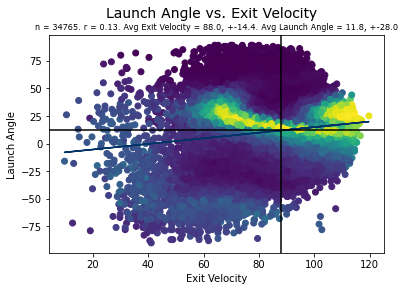

In [172]:
x = df.launch_speed
y = df.launch_angle
title = 'Launch Angle vs. Exit Velocity'
xlabel = 'Exit Velocity'
ylabel = 'Launch Angle'

##################################
# graph(x,y,title,xlabel,ylabel) #
##################################

r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
#title = 'Velo vs. Spin Rate' # Title the graph
#xlabel = 'Spin' # Label the x axis
#ylabel = 'Velo' # Label the y axis
colors = df.estimated_ba_using_speedangle

# Build the plot
plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                ,r
                                                                  ,xlabel
                                                                  ,round(x.mean(),1)
                                                                  ,round(x.std(),1)
                                                                  ,ylabel
                                                                  ,round(y.mean(),1)
                                                                  ,round(y.std(),1)
                                                                 ), fontsize = 8, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

# Out Events

In [173]:
# 'field_out' ## 1
# 'strikeout' ## 1
# 'force_out' ## 1
# 'grounded_into_double_play' ## 2
# 'sac_fly' ## 1
# 'sac_bunt' ## 1
# 'double_play' ## 2
# 'fielders_choice_out' ## 1
# 'caught_stealing_2b' ## 1
# 'strikeout_double_play' ## 2
# 'other_out' ## 1
# 'caught_stealing_home' ## 1
# 'sac_fly_double_play' ## 2
# 'pickoff_1b' ## 1
# 'pickoff_caught_stealing_2b' ## 1
# 'caught_stealing_3b' ## 1
# 'pickoff_2b' ## 1
# 'triple_play' ## 3
# 'sac_bunt_double_play' ## 2
phils_sc.groupby(['events'],as_index=False).agg({'pitch_number' : 'count'}).sort_values(by='pitch_number', ascending=False)

,events,pitch_number
7,field_out,41100
25,strikeout,23742
24,single,15083
29,walk,8075
4,double,4701
13,home_run,3313
10,force_out,2088
11,grounded_into_double_play,1927
12,hit_by_pitch,1051
6,field_error,782


# Drinking

## 3-0 HRs hit by the Phillies

In [174]:
hrs = pos[pos.events == 'home_run']
hrs[(hrs.balls == 3) 
    & (hrs.strikes == 0)
    #& (hrs.game_year == 2023)
   ].loc[:, ['game_date','inning','player_name']]

,game_date,inning,player_name
11801,2015-06-30,6,"Ruiz, Carlos"
12854,2015-06-22,6,"Franco, Maikel"
33438,2016-07-10,8,"Franco, Maikel"
43858,2016-04-17,2,"Ruiz, Carlos"
54391,2017-07-31,7,"Franco, Maikel"
59037,2017-06-23,8,"Franco, Maikel"
107276,2019-06-24,5,"Franco, Maikel"
133514,2021-08-22,4,"Hoskins, Rhys"
142955,2021-06-08,4,"Harper, Bryce"
168074,2022-06-01,6,"Schwarber, Kyle"


In [175]:
hrs.launch_angle.mean(), hrs.launch_angle.std()

(28.359578425294483, 5.344081656858092)

(array([ 16.,  79., 200., 443., 349., 259., 184.,  57.,  16.,  10.]),
 array([14. , 17.3, 20.6, 23.9, 27.2, 30.5, 33.8, 37.1, 40.4, 43.7, 47. ]),
 <BarContainer object of 10 artists>)

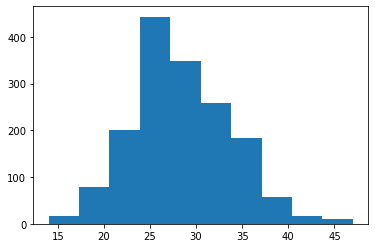

In [176]:
plt.hist(hrs.launch_angle)

In [177]:
hrs[hrs.hit_distance_sc ==hrs.hit_distance_sc.min()] # Shortest HR is Altherr's inside-the-park grand slam

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
1193,FF,2015-09-25,94.7,-1.98,5.96,"Altherr, Aaron",571437,519455,home_run,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134


(array([  6.,  30.,  96., 237., 412., 432., 279.,  95.,  24.,   2.]),
 array([ 87.8 ,  90.99,  94.18,  97.37, 100.56, 103.75, 106.94, 110.13,
        113.32, 116.51, 119.7 ]),
 <BarContainer object of 10 artists>)

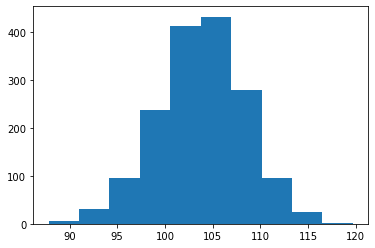

In [178]:
plt.hist(hrs.launch_speed)

In [179]:
df = altherr = pos[pos.player_name == 'Altherr, Aaron']

In [180]:
results('p_throws')

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,1306,334,217,61,12,40,74,0.211,0.311,0.415,0.727,0.315
1,R,3131,781,454,157,24,64,240,0.227,0.307,0.403,0.710,0.308


In [181]:
df = altherr_hrs = df[df.events == 'home_run']
df[df.launch_speed == df.launch_speed.max()].loc[:, ['game_date', 'inning', 'launch_speed', 'launch_angle']]

,game_date,inning,launch_speed,launch_angle
47356,2017-09-19,8,108.5,18.0
71962,2018-09-14,2,108.5,26.0


In [182]:
df = realmuto = pos[pos.player_name == 'Realmuto, J.T.']
df = jt_hrs = df[df.events == 'home_run']
df[df.launch_speed == df.launch_speed.max()]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
118925,SI,2019-03-30,91.3,-2.4,5.81,"Realmuto, J.T.",592663,641149,home_run,hit_into_play,...,0.719,0.87,1.217,1.529,1.94,0.2,-0.435,0.126,10.296,3.214


In [183]:
df = maikel = pos[pos.player_name == 'Franco, Maikel']
df = maikel_hrs = df[df.events == 'home_run']
df[df.hit_distance_sc == df.hit_distance_sc.max()].loc[:, ['hit_distance_sc']]

,hit_distance_sc
33438,471.0


In [184]:
df = kingery = pos[pos.player_name == 'Kingery, Scott']
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2018,1964,486,331,102,8.0,23.0,126,0.224,0.263,0.336,0.600,0.261
1,2019,1973,499,314,118,19.0,33.0,147,0.258,0.313,0.474,0.786,0.328
2,2020,468,125,79,18,3.0,9.0,35,0.158,0.224,0.281,0.505,0.224
3,2021,75,19,7,1,0.0,0.0,12,0.053,0.053,0.053,0.105,0.046


In [185]:
df = quinn = pos[pos.player_name == 'Quinn, Roman']
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2016,268,69,40,15,0.0,8,19,0.263,0.362,0.333,0.696,0.313
1,2018,560,143,97,34,2.0,10,35,0.260,0.315,0.412,0.727,0.314
2,2019,448,122,75,23,4.0,12,34,0.213,0.295,0.370,0.665,0.287
3,2020,454,116,70,23,2.0,5,39,0.213,0.259,0.315,0.573,0.252
4,2021,255,62,33,9,0.0,6,19,0.173,0.306,0.288,0.595,0.275
5,2022,168,40,22,6,0.0,3,15,0.162,0.225,0.189,0.414,0.194


In [186]:
len(quinn), len(maikel), len(altherr), len(kingery)

(2153, 8934, 4437, 4480)

In [187]:
tojo = pos[pos.player_name == 'Joseph, Tommy']

In [188]:
len(tojo)

3348

In [189]:
df=pos.groupby(['player_name'],as_index=False).agg({'des' : 'count'}
                                               ).rename(columns={'des' : 'pitches'})

In [190]:
df[df.pitches > df[df.player_name == 'Quinn, Roman'].pitches.values[0]].sort_values(by='pitches')

,player_name,pitches
13,"Blanco, Andrés",2347
8,"Asche, Cody",2636
139,"Santana, Carlos",2801
96,"Marsh, Brandon",2858
154,"Turner, Trea",2883
75,"Howard, Ryan",3269
59,"Gregorius, Didi",3309
89,"Knapp, Andrew",3314
82,"Joseph, Tommy",3348
165,"Williams, Nick",3376


In [191]:
df = stott = pos[pos.player_name == 'Stott, Bryson']

In [192]:
df[df.game_date == df.game_date.min()
   #&(df.events.isna() == False)
  ].loc[:, ['inning', 'at_bat_number', 'events']].sort_values(by= 'inning')

,inning,at_bat_number,events
175441,2,14,NaN
175440,2,14,NaN
175439,2,14,NaN
175438,2,14,field_out
175400,4,31,strikeout
175403,4,31,NaN
175402,4,31,NaN
175401,4,31,NaN
175404,4,31,NaN
175474,6,46,single


In [193]:
df = casty = pos[pos.player_name == 'Castellanos, Nick']

In [194]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
151707,SI,2022-10-05,92.1,0.87,6.31,"Castellanos, Nick",592206,664285,field_out,hit_into_play,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
151708,CU,2022-10-05,79.4,1.03,6.10,"Castellanos, Nick",592206,664285,NaN,ball,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
151709,SI,2022-10-05,94.5,0.60,6.31,"Castellanos, Nick",592206,664285,NaN,ball,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
151710,SI,2022-10-05,94.6,0.60,6.33,"Castellanos, Nick",592206,664285,NaN,ball,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
151711,CU,2022-10-05,77.6,1.05,6.14,"Castellanos, Nick",592206,664285,NaN,foul,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203999,SL,2023-10-03,84.3,-1.51,5.37,"Castellanos, Nick",592206,666277,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
204004,SL,2023-10-03,83.9,-1.54,5.40,"Castellanos, Nick",592206,666277,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
204009,CH,2023-10-03,88.6,-1.36,5.58,"Castellanos, Nick",592206,666277,NaN,foul,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
204014,FF,2023-10-03,94.0,-1.51,5.24,"Castellanos, Nick",592206,666277,NaN,ball,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


# Zolecki's Projected Opening Day Roster

In [195]:
nphl[nphl.player_name == 'Harper, Bryce'].batter.unique().tolist()[0]

547180

0 - 12 **Designated Hitters**<br>
1 - 45,27,55,99,61 50,68,46,58,30,25 **Pichers**<br>
2 - 10,21 **Catchers**<br>
3 - 3,28,10,44,17,6 **First Baseman**<br>
4 - 5,26,33,4 **Second Baseman**<br>
5 - 28,33,20 **Third Baseman**<br>
6 - 7,33,5,11 **Shortstop**<br>
7 - 16,12,8,44,19 **Left Field**<br>
8 - 18,16,3,19 **Center Field**<br>
9 - 8,3,16,19,18 **Right Field**<br>
<br>
*Roster with player_name and player_id and Player Name and Number*<br>
__Player       Number  player_name    player_id    team        ballpark__<br>
Zack Wheeler   45   'Wheeler, Zack' 554430    'PHI','NYM'  'CBP','Non CBP'<br>
Bryce Harper    3   'Harper, Bryce' 547180    'PHI','WAS'  'CBP','Non CBP'<br>
<br>
Phillies Season 2023 'Phillies 2023 Season' pos2023 'PHI',... 'CBP', 'Non CBP'<br>
Phillies Statcast Average 100 'Phillies Statcast Average' phils_sc 'PHI',... 'CBP', 'Non CBP'<br>
League Average 101 'League Average' mlb 'PHI',... 'CBP',...<br>

In [196]:
## SQL Equivalent

```sql
declare @player_id int = ''
declare @player_name varchar(100) = ''
--wheeler = pps[pps.player_id == @player_id]
select
from phillies_pitching pps
join pitchers p on pps.player_id = p.player_id and p.jersey_number = @player_id

union

select
from non_phillies nphl
join pitchers p on nphl.player_id = p.player_id and nphl.player_name = @player_name
```

In [197]:
## Python
df = wheeler = pd.concat([pps[pps.pitcher == 554430],pd.read_csv('wheeler_np.csv')])

In [198]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
119867,CH,2020-09-26,91.5,-1.46,5.43,"Wheeler, Zack",660294,554430,walk,blocked_ball,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
119868,FF,2020-09-26,96.2,-1.38,5.49,"Wheeler, Zack",660294,554430,NaN,ball,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
119869,FS,2020-09-26,90.4,-1.43,5.47,"Wheeler, Zack",660294,554430,NaN,called_strike,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
119870,SI,2020-09-26,94.7,-1.41,5.43,"Wheeler, Zack",660294,554430,NaN,ball,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
119871,FS,2020-09-26,88.4,-1.44,5.55,"Wheeler, Zack",660294,554430,NaN,ball,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7599,SI,2017-04-07,96.2,-1.49,5.78,"Wheeler, Zack",543829,554430,field_out,hit_into_play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7600,SI,2017-04-07,96.2,-1.48,5.70,"Wheeler, Zack",543829,554430,NaN,foul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7601,SI,2017-04-07,94.9,-1.57,5.71,"Wheeler, Zack",543829,554430,NaN,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7602,SI,2017-04-07,94.9,-1.48,5.76,"Wheeler, Zack",543829,554430,NaN,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# How Well Can I Predict the Player of the Game in a Phillies Win?

# No, guys who added killer Sweepers post-Phillies?
Nick Pivetta
Zach Eflin

In [199]:
df = orion = pps[pps.pitcher == pps[pps.player_name == 'Kerkering, Orion'].pitcher.unique().tolist()[0]]

stats = ['max','min','median','mean','std']
#columns = ['release_speed','release_spin']
for s in stats:
df.groupby(['pitch_name','pitch_type'],as_index=False
          ).agg({'release_speed' : s
                }
               ).rename(columns = {}.round(1)

In [200]:
s = 'mean'
df.groupby(['pitch_name','pitch_type'],as_index=False
          ).agg({'release_pos_x' : s
                 ,'release_pos_z' : s
                 ,'pfx_x' : s
                 ,'pfx_z' : s
                 ,'plate_x' : s
                 ,'plate_z' : s
                 ,'zone' : s
                }
               )[['pitch_name','release_pos_x'
                 ,'pfx_x','plate_x']].round(2)

,pitch_name,release_pos_x,pfx_x,plate_x
0,Sinker,-1.19,-0.93,0.19
1,Sweeper,-1.66,1.42,0.32


# How Guys Pitch to JT vs Other Catchers

In [200]:
len(non_jt_pps.pitcher.unique().tolist())

95

In [204]:
njtpps = non_jt_pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})
jtpps = jt_pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})

df_merged = njtpps.merge(jtpps, left_on = 'pitcher', right_on = 'pitcher', how = 'left', suffixes = ('','_jt'))

In [206]:
df_merged[df_merged.player_name_jt.isna() == True]

,player_name,pitcher,player_name_jt
0,"Altherr, Aaron",571437,NaN
12,"Cleavinger, Garrett",664076,NaN
20,"Dohy, Kyle",675971,NaN
22,"Duron, Nick",663975,NaN
32,"Hall, Darick",669742,NaN
35,"Harrison, Josh",543281,NaN
77,"Rossman, Bubby",657745,NaN
91,"Walker, Neil",435522,NaN


In [223]:
mcgs('fielder_2',pps[pps.pitcher == 592836])[['fielder_2','plate_apps','at_bats','bip','hits', 'doubles','triples','hrs','walks','strikeouts'
                         ,'ba','obp','slg','ops']].round(3)

,fielder_2,plate_apps,at_bats,bip,hits,doubles,triples,hrs,walks,strikeouts,ba,obp,slg,ops
0,592663,596,533,418,128,27,3,17,56,114,0.240,0.315,0.398,0.713
1,596117,140,121,98,27,8,1,3,14,24,0.223,0.321,0.380,0.702


In [237]:
mcgs('fielder_2',pps[pps.pitcher == 592836])

,fielder_2,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
0,592663,2278,596,533,128,81,27,3,17,56,...,114,418,0.309512,0.347243,34.068,0.24015,0.315436,0.397749,0.713185,0.311688
1,596117,559,140,121,27,15,8,1,3,14,...,24,98,0.324776,0.360500,6.012,0.22314,0.321429,0.380165,0.701594,0.310186


In [233]:
pos[pos.batter.isin(pps[pps.pitcher == 592836].fielder_2)].groupby('player_name',as_index=False).agg({'batter' : 'max', 'des' : 'count'})

,player_name,batter,des
0,"Realmuto, J.T.",592663,9943
1,"Stubbs, Garrett",596117,1001


In [229]:
pps[pps.batter.isin(pps[pps.pitcher == 592836].fielder_2.unique().tolist())].groupby('player_name',as_index=False).agg({'des' : 'count'})

,player_name,des
0,"Arano, Víctor",6
1,"Arrieta, Jake",51
2,"Asher, Alec",9
3,"Bailey, Andrew",6
4,"Benoit, Joaquín",7
5,"Billingsley, Chad",5
6,"Buchanan, David",4
7,"Curtis, Zac",1
8,"Davis, Austin",4
9,"De Fratus, Justin",9


In [199]:
len(jt_pps.pitcher.unique().tolist())

94

In [193]:
jt_pps = pps[pps.fielder_2 == jt_id]
mcgs('fielder_2',jt_pps)[['plate_apps','at_bats','bip','hits', 'doubles','triples','hrs','walks','strikeouts'
                         ,'ba','obp','slg','ops']].round(3)

,plate_apps,at_bats,bip,hits,doubles,triples,hrs,walks,strikeouts,ba,obp,slg,ops
0,20964,18937,14138,4689,911,82,675,1617,4956,0.248,0.311,0.411,0.723


In [217]:
non_jt_pps = pps[(pps.fielder_2 != jt_id) & (pps.game_year >= 2019)]
mcgs('player_name',non_jt_pps)[['player_name','plate_apps','at_bats','bip','hits', 'doubles','triples','hrs','walks','strikeouts'
                         ,'ba','obp','slg','ops']].round(3).sort_values(by='plate_apps',ascending=False).head(25)

,player_name,plate_apps,at_bats,bip,hits,doubles,triples,hrs,walks,strikeouts,ba,obp,slg,ops
23,"Eflin, Zach",615,576,432.0,147.0,36.0,2.0,25.0,31.0,149.0,0.255,0.294,0.455,0.749
65,"Nola, Aaron",533,493,327.0,108.0,21.0,2.0,16.0,29.0,167.0,0.219,0.272,0.367,0.639
83,"Suárez, Ranger",511,465,363.0,130.0,29.0,2.0,11.0,33.0,111.0,0.280,0.327,0.422,0.748
93,"Wheeler, Zack",396,365,271.0,80.0,11.0,2.0,8.0,21.0,99.0,0.219,0.268,0.326,0.594
29,"Gibson, Kyle",328,305,231.0,76.0,14.0,2.0,10.0,16.0,75.0,0.249,0.296,0.407,0.702
89,"Velasquez, Vince",297,259,181.0,66.0,14.0,1.0,12.0,32.0,77.0,0.255,0.350,0.456,0.806
25,"Falter, Bailey",198,179,140.0,46.0,7.0,2.0,9.0,14.0,40.0,0.257,0.318,0.469,0.787
11,"Brogdon, Connor",198,184,130.0,36.0,9.0,0.0,4.0,13.0,53.0,0.196,0.253,0.310,0.562
85,"Sánchez, Cristopher",183,170,131.0,39.0,12.0,0.0,7.0,7.0,41.0,0.229,0.273,0.424,0.697
62,"Neris, Hector",160,145,96.0,30.0,3.0,0.0,4.0,12.0,49.0,0.207,0.281,0.310,0.592


## Taijuan Walker Throwing to JT
He only threw 6 games to him? Something is off?

In [238]:
mcgs('fielder_2',pps[pps.pitcher == 592836]) # Taijuan Walker id

,fielder_2,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
0,592663,2278,596,533,128,81,27,3,17,56,...,114,418,0.309512,0.347243,34.068,0.24015,0.315436,0.397749,0.713185,0.311688
1,596117,559,140,121,27,15,8,1,3,14,...,24,98,0.324776,0.360500,6.012,0.22314,0.321429,0.380165,0.701594,0.310186


In [67]:
pos[pos.player_name.isin(['Realmuto, J.T.','Stubbs, Garrett'])].groupby('player_name',as_index=False).agg({'batter' : 'max'})

,player_name,batter
0,"Realmuto, J.T.",592663
1,"Stubbs, Garrett",596117


In [240]:
pitch_mix(pps[(pps.pitcher == 592836) & (pps.fielder_2 == 592663)])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FS,Split-Finger,774,87.949483,1420.750325,10.745478,34.0
4,SI,Sinker,525,92.500381,1972.301527,8.215238,23.0
2,FF,4-Seam Fastball,420,92.910238,2126.177458,7.845238,18.4
1,FC,Cutter,362,87.135359,2380.650970,8.566298,15.9
0,CU,Curveball,121,75.011570,2366.550000,9.917355,5.3
5,ST,Sweeper,76,82.542105,2593.826667,9.197368,3.3


In [242]:
walker_id = 592836
walker_np = nphl[nphl.pitcher == walker_id]
walker_phl = pps[pps.pitcher == walker_id]
taijuan = pd.concat([walker_np, walker_phl])
lhb = lhb_pitch_mix(taijuan)
rhb = rhb_pitch_mix(taijuan)

In [245]:
lhb.round(2)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,3620,93.87,2109.91,7.68,43.8
3,FS,Split-Finger,2079,88.49,1489.10,10.21,25.1
0,CU,Curveball,987,75.37,2257.93,9.82,11.9
6,SI,Sinker,725,93.31,2009.02,8.01,8.8
1,FC,Cutter,580,87.92,2284.86,8.64,7.0
7,SL,Slider,260,85.50,2400.12,8.93,3.1
4,IN,Intentional Ball,6,61.05,1459.00,11.00,0.1
5,PO,Pitch Out,3,86.37,1984.33,11.00,0.0
8,ST,Sweeper,3,83.63,2426.33,10.33,0.0


In [246]:
rhb.round(2)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,3677,94.43,2126.92,7.92,41.7
3,FS,Split-Finger,1530,88.87,1501.97,10.44,17.3
5,SI,Sinker,1142,93.10,2004.69,8.30,12.9
1,FC,Cutter,954,87.59,2309.15,10.07,10.8
6,SL,Slider,901,85.55,2418.33,10.52,10.2
0,CU,Curveball,537,75.76,2250.11,9.58,6.1
7,ST,Sweeper,78,82.50,2592.13,9.12,0.9
4,IN,Intentional Ball,4,61.55,1681.00,12.00,0.0


In [250]:
walker_phl[walker_phl.pitch_type == 'ST'].groupby('pitch_type',as_index=False
                                                 ).agg({'release_speed' : 'mean'
                                                        ,'release_spin_rate' : 'mean'
                                                        ,'zone' : 'mean'
                                                       }
                                                      ).round(2)

,pitch_type,release_speed,release_spin_rate,zone
0,ST,82.53,2588.18,9.16


In [256]:
pps[pps.pitch_type == 'ST'].groupby(['player_name','game_year'],as_index=False).agg({'pitcher' : 'max'
                                                                   ,'release_speed' : 'mean'
                                                                   ,'release_spin_rate' : 'mean'
                                                                   ,'zone' : 'mean'
                                                                       ,'des' : 'count'
                                                                  }
                                                                 ).round(2).sort_values(by='des',ascending=False)

,player_name,game_year,pitcher,release_speed,release_spin_rate,zone,des
4,"Hand, Brad",2022,543272,79.36,2292.16,9.93,486
13,"Wheeler, Zack",2023,554430,84.25,2647.65,11.07,468
8,"Kerkering, Orion",2023,689147,86.18,2950.48,9.85,118
11,"Ortiz, Luis F.",2023,656814,81.58,2694.78,8.34,113
3,"Gibson, Kyle",2022,502043,82.85,2463.33,10.72,102
12,"Walker, Taijuan",2023,592836,82.53,2588.18,9.16,79
7,"Kelly, Michael",2022,547184,82.74,2551.44,8.93,45
9,"Lorenzen, Michael",2023,547179,83.30,2528.08,10.17,36
6,"Howard, Spencer",2021,675921,78.91,2074.94,12.00,32
10,"Moore, McKinley",2023,686842,84.89,2814.77,9.19,31


# If I am going to tie to Catcher, I can use game_year as a proxy to get me to player_ids
# I can then connect that fielder_2 to batter on the pos df to find the player_name

df = pps[pps.player_name == 'Nola, Aaron']
results('fielder_2')

In [201]:
player = 'Walker, Taijuan'
taijuan = pd.concat([pps[pps.player_name == player], nphl[nphl.player_name == player]])

In [202]:
df = jt_def_taijuan = jt_def[jt_def.pitcher == taijuan.pitcher.unique().tolist()[0]]
tai2jt = results('fielder_2')

df = taijuan_non_jt = taijuan[taijuan.fielder_2 != jt_id]
tai2else = results('fielder_2')

In [203]:
tai2jt

,fielder_2,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,592663,2278,596,418,128,17,56,114,0.24,0.315,0.398,0.713,0.312


In [204]:
tai2else

,fielder_2,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,425772,812,194,145,46,4.0,11.0,37.0,0.254,0.299,0.414,0.713,0.00
1,455104,3007,742,514,165,26.0,50.0,169.0,0.247,0.301,0.423,0.723,0.00
2,456078,97,27,20,6,2.0,4.0,3.0,0.261,0.370,0.565,0.936,0.00
3,488671,224,56,42,15,1.0,5.0,9.0,0.294,0.357,0.392,0.749,0.00
4,491696,431,114,86,30,5.0,5.0,22.0,0.280,0.316,0.486,0.802,0.00
5,502182,107,26,20,9,2.0,3.0,2.0,0.409,0.462,0.773,1.234,0.00
6,543302,512,123,84,26,6.0,11.0,24.0,0.241,0.333,0.491,0.824,0.00
7,543308,96,24,16,4,0.0,0.0,7.0,0.174,0.208,0.174,0.382,0.00
8,543376,15,4,3,1,0.0,0.0,1.0,0.250,0.250,0.500,0.750,0.00
9,543510,2301,591,404,121,23.0,49.0,133.0,0.228,0.296,0.399,0.695,0.00


# Spring Training 2024 as of March 3rd, 2024.

In [205]:
spring_training_2024=st=st_as_of_20240303=pps=pd.read_csv('spring_training_2024 ppst.csv')

In [206]:
ppst24 = pd.read_csv('spring_training_2024 ppst.csv')
post24 = pd.read_csv('spring_training_2024 post.csv')
phils_st_2024 = pd.concat([ppst24, post24])

In [207]:
ppst24.groupby('game_date',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                             ,'pitcher' : 'nunique'
                                             ,'batter' : 'nunique'
                                             #,'strikeouts' : '
                                            }).rename(columns = {'des' : 'pitches'
                                                                 ,'game_pk' : 'games'
                                                                 ,'batter' : 'batters'
                                                                 ,'pitcher' : 'pitchers'
                                                                })

,game_date,pitches,games,pitchers,batters
0,2024-02-24,173,1,8,18
1,2024-02-25,136,1,8,14
2,2024-02-26,83,1,10,18
3,2024-02-27,123,1,9,19
4,2024-02-28,141,1,9,18
5,2024-02-29,152,1,7,18
6,2024-03-01,237,2,12,36
7,2024-03-02,159,1,8,18


# Mick Abel
What does Mick Abel profile as? He is a sinker/slider guys to RHB. Is he pouding the outside corner or is working inside? Who throws a similar sinker?

To righties, he is the Sinker Slider guy.

To lefties, he is FF, CU, CH

In [208]:
abel_id = ppst24[ppst24.player_name == 'Abel, Mick'].pitcher.unique().tolist()[0]
df = abel = abel_df = ppst24[ppst24.pitcher == abel_id]

In [209]:
group = 'stand'
df = abel_pitch_mix_by_stand = pitch_mix_by_group(abel_df, group)

In [210]:
# def lhb_pitch_mix(df):
#     return pitch_mix(df[df.stand == 'L'])

# def rhb_pitch_mix(df):
#     return pitch_mix(df[df.stand == 'R'])

In [211]:
df = abel
abel_lhb = pitch_mix(df[df.stand == 'L'])
abel_rhb = pitch_mix(df[df.stand == 'R'])


In [212]:
abel_lhb, abel_rhb

(  pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
 2         FF  4-Seam Fastball      4         95.875             2376.0   4.5   
 1         CU        Curveball      2         80.150             2498.0  12.0   
 0         CH         Changeup      1         87.000             1662.0   5.0   
 
    usage  
 2   57.1  
 1   28.6  
 0   14.3  ,
   pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
 1         SI           Sinker      4          94.95             2278.5   6.75   
 2         SL           Slider      4          85.00             2324.5  10.75   
 0         FF  4-Seam Fastball      1          95.60             2419.0  12.00   
 
    usage  
 1   44.4  
 2   44.4  
 0   11.1  )

In [213]:
def pitch_mix(df):
    # Pitch Mix
    pm  = df.groupby(['pitch_type', 'pitch_name'], as_index=False).agg({'des' : 'count'
                                                                        ,'release_speed' : 'mean'
                                                                        ,'release_spin_rate' : 'mean'
                                                                        ,'zone' : 'mean'
                                                                        ,'stand' : 'max'
                                                                       }
                                                                    ).rename(columns = {'des' : 'count'}
                                                                            ).sort_values(by = 'count', ascending = False)
    pm['usage'] = round((pm['count']/len(df))*100,1)
    return pm
abel_lhb = pitch_mix(abel_df[abel_df.stand == 'L'])
abel_rhb = pitch_mix(abel_df[abel_df.stand == 'R'])
abel = pd.concat([abel_lhb, abel_rhb])

In [214]:
abel_lhb, abel_rhb

(  pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
 2         FF  4-Seam Fastball      4         95.875             2376.0   4.5   
 1         CU        Curveball      2         80.150             2498.0  12.0   
 0         CH         Changeup      1         87.000             1662.0   5.0   
 
   stand  usage  
 2     L   57.1  
 1     L   28.6  
 0     L   14.3  ,
   pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
 1         SI           Sinker      4          94.95             2278.5   6.75   
 2         SL           Slider      4          85.00             2324.5  10.75   
 0         FF  4-Seam Fastball      1          95.60             2419.0  12.00   
 
   stand  usage  
 1     R   44.4  
 2     R   44.4  
 0     R   11.1  )

## Similar Phillies

In [215]:
phils_sc, pos, pps = get_phillies_data()

Length of phils_sc dataframe: 407099


In [216]:
# Phillies RHP
rhp = pps[pps.p_throws == 'R']
df = rhp_minus_abel = rhp[rhp.pitcher != abel_id]

In [217]:
def get_players_pitch_mix(pps):
    all_x = pd.DataFrame()
    for p in pps.player_name.unique().tolist():
        x = pitch_mix_by_group(pps[pps.player_name == p], 'stand')
        all_x = pd.concat([all_x, x])
        return all_x

In [218]:
df = get_players_pitch_mix(rhp_minus_abel)

In [219]:
ff = rhp_minus_abel[(rhp_minus_abel.pitch_type == 'FF')
                   #&(rhp_minus_abel.zone >=
                   ]

ff_mu = ff.groupby('player_name', as_index=False).agg({'release_speed' : 'mean'})

ff_mu[(ff_mu.release_speed >= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'FF')
                                    ].release_speed.min())
     &(ff_mu.release_speed <= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'FF')
                                    ].release_speed.max())
     ]

,player_name,release_speed
13,"Brogdon, Connor",95.461731
27,"Familia, Jeurys",95.597080
28,"Feliz, Neftalí",95.577778
50,"Hunter, Tommy",95.791398
54,"Kimbrel, Craig",95.801435
57,"Knebel, Corey",95.641081
71,"Nelson, Nick",96.181622
78,"Ogando, Nefi",96.102273
84,"Pinto, Ricardo",95.631364


So guys with similar fastballs to Mick Abel are guys like Brogdon, Familia, Tommy Hunter, Craig Kimbrel. Nick Nelson.

It seems like guys with good curveballs, wel lnot Brogdon. But maybe he could do that?


ff_mu[(ff_mu.release_speed >= abel_mu_ff-abel_sd_ff)
      &(ff_mu.release_speed <= abel_mu_ff+abel+sd+ff)
     ]

In [220]:
abel_mu_ff = abel[abel.pitch_type == 'FF'].release_speed.mean()
ff[(ff.stand == 'R')].groupby(['player_name','pitcher', 'stand'],as_index=False).agg({'release_speed' : 'mean'
                                                                                    ,'release_spin_rate' : 'mean'
                                                                                    #,'stand' : 'Max'
                                                                                    ,'zone' : 'mean'
                                                                                   }).round(3)


,player_name,pitcher,stand,release_speed,release_spin_rate,zone
0,"Altherr, Aaron",571437,R,88.567,2292.500,3.833
1,"Alvarez III, Henderson",506693,R,91.674,1905.468,8.532
2,"Anderson, Chase",502624,R,91.309,2116.757,8.667
3,"Anderson, Drew",623454,R,92.779,2300.663,7.416
4,"Arano, Víctor",644364,R,94.261,2350.011,7.417
...,...,...,...,...,...,...
98,"Vincent, Nick",543883,R,88.796,2329.145,7.474
99,"Walker, Taijuan",592836,R,93.319,2123.600,7.957
100,"Wheeler, Zack",554430,R,96.529,2440.638,7.472
101,"Williams, Jerome",425532,R,90.817,2156.143,9.083


In [221]:
# Ok So Look at his curveball

(array([  37.,   43.,   64.,   49.,  255., 1711., 4188., 3042.,  493.,
          70.]),
 array([ 521. ,  818.3, 1115.6, 1412.9, 1710.2, 2007.5, 2304.8, 2602.1,
        2899.4, 3196.7, 3494. ]),
 <BarContainer object of 10 artists>)

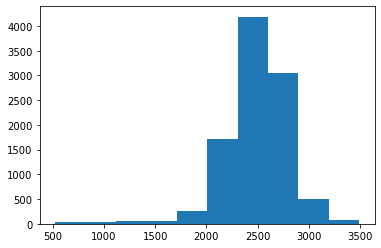

In [222]:
ppst24[(ppst24.pitcher == abel_id)
       &(ppst24.pitch_type == 'CU')
      ].release_spin_rate.tolist() # Abel's Curveballs
# They are 80 mph with 2500 rpm spin rate

rhp[rhp.pitch_type == 'CU'].release_spin_rate.std() # Phillies RHP Curveballs
# It is about 300 rpm

x = rhp[rhp.pitch_type == 'CU'].release_spin_rate
plt.hist(x) # A histogram of Curveball Spin Rates

In [223]:
cu = rhp_minus_abel[(rhp_minus_abel.pitch_type == 'CU')
                   #&(rhp_minus_abel.zone >=
                   ]

cu_mu = cu.groupby('player_name', as_index=False).agg({'release_speed' : 'mean'})

cu_mu[(cu_mu.release_speed >= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'CU')
                                    ].release_speed.min())
     &(cu_mu.release_speed <= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'CU')
                                    ].release_speed.max())
     ]

,player_name,release_speed
0,"Alvarez III, Henderson",79.463636
3,"Arrieta, Jake",80.749841
4,"Asher, Alec",80.357009
5,"Aumont, Phillippe",80.476667
17,"Fien, Casey",79.875000
20,"González, Severino",79.999216
27,"Hembree, Heath",80.730435
31,"Hughes, Jared",79.920000
34,"Klein, Phil",80.118750
40,"Medina, Adonis",80.007895


Vinny Velo threw a similar speed curveball. So Did Jake Arrieta, Alec Asher, and Jared Hughes. Yikes, what about the spin rate?

In [224]:
cu = rhp_minus_abel[(rhp_minus_abel.pitch_type == 'CU')
                   #&(rhp_minus_abel.zone >=
                   ]

cu_mu = cu.groupby('player_name', as_index=False).agg({'release_spin_rate' : 'mean'})

cu_mu[(cu_mu.release_spin_rate >= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'CU')
                                    ].release_spin_rate.min()-300)
     &(cu_mu.release_spin_rate <= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'CU')
                                    ].release_spin_rate.max()+300)
     ]

,player_name,release_spin_rate
2,"Anderson, Drew",2703.050000
3,"Arrieta, Jake",2758.671429
4,"Asher, Alec",2256.843137
5,"Aumont, Phillippe",2500.866667
6,"Bailey, Andrew",2700.473684
7,"Beato, Pedro",2289.000000
9,"Billingsley, Chad",2304.352941
11,"Buchanan, David",2228.855172
12,"Buchholz, Clay",2628.250000
13,"Correia, Kevin",2239.711864


In [225]:
# Pretty average curveball. Throws them mostly to LHB, lefties.

In [226]:
# He is Sinker Slider to RHB

In [227]:
# So everything above that was wrong, lol. No I think I am good.

# abel_mu_si = 94.95 +- .78
abel_mu_si = ppst24[(ppst24.pitcher == abel_id)
                    &(ppst24.pitch_type == 'SI')
                   ]#.groupby('pitch_type').agg({
abel_mu_si.release_speed.std()

si = rhp_minus_abel[(rhp_minus_abel.pitch_type == 'SI')
                   #&(rhp_minus_abel.zone >=
                   ]

si_mu = si.groupby('player_name', as_index=False).agg({'release_speed' : 'mean'})

si_mu[(si_mu.release_speed >= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'SI')
                                    ].release_speed.min())
     &(si_mu.release_speed <= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'SI')
                                    ].release_speed.max())
     ].round(3).sort_values(by='release_speed', ascending=False)

,player_name,release_speed
74,"Ríos, Yacksel",95.524
23,"Familia, Jeurys",95.268
16,"Covey, Dylan",95.212
69,"Pinto, Ricardo",95.071
3,"Appel, Mark",94.966
39,"Howard, Spencer",94.900
11,"Brogdon, Connor",94.900
8,"Benoit, Joaquín",94.680
37,"Hernandez, David",94.629
41,"Hunter, Tommy",94.575


His Sinker is like Mark Appel, Jeurys Familia, Ken Giles, Spencer Howard, Nick Pivetta.

In [228]:
# His Slider

In [229]:
# So everything above that was wrong, lol. No I think I am good.

# abel_mu_sl = 84-86 with 
abel_mu_sl = ppst24[(ppst24.pitcher == abel_id)
                    &(ppst24.pitch_type == 'SL')
                   ]#.groupby('pitch_type').agg({
abel_mu_sl.release_speed.std()

sl = rhp_minus_abel[(rhp_minus_abel.pitch_type == 'SL')
                   #&(rhp_minus_abel.zone >=
                   ]

sl_mu = sl.groupby('player_name', as_index=False).agg({'release_speed' : 'mean'})

sl_mu[(sl_mu.release_speed >= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'SL')
                                    ].release_speed.min())
     &(sl_mu.release_speed <= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'SL')
                                    ].release_speed.max())
     ]

,player_name,release_speed
0,"Altherr, Aaron",84.833333
1,"Alvarez III, Henderson",85.468750
2,"Anderson, Chase",83.878378
5,"Arano, Víctor",84.441400
7,"Asher, Alec",85.333594
9,"Bellatti, Andrew",85.956833
15,"Crouse, Hans",85.222449
18,"Devenski, Chris",83.933333
26,"Francoeur, Jeff",84.765000
28,"García, Luis",85.185236


In [230]:
abel_mu_sl.release_speed.mean(), round(abel_mu_sl.release_speed.std(),3)

(85.0, 0.92)

In [231]:
sl_mu = sl.groupby('player_name', as_index=False).agg({'release_spin_rate' : 'mean'})


In [232]:
ppst24[(ppst24.pitcher == abel_id)
       &(ppst24.pitch_type == 'SL')
      ].release_spin_rate.mean()

2324.5

In [233]:
sl_mu[(sl_mu.release_spin_rate >= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'SL')
                                    ].release_spin_rate.min())
     &(sl_mu.release_spin_rate <= ppst24[(ppst24.pitcher == abel_id)
                                     &(ppst24.pitch_type == 'SL')
                                    ].release_spin_rate.max())
     ]

,player_name,release_spin_rate
22,"Eickhoff, Jerad",2292.142994
27,"García, Edgar",2356.668622
35,"Hellickson, Jeremy",2368.167883
45,"Kennedy, Ian",2308.739130
46,"Kintzler, Brandon",2350.211268
52,"Llovera, Mauricio",2354.842105
56,"McClain, Reggie",2296.916667
58,"Medina, Adonis",2347.516129
61,"Nelson, Nick",2270.313725


So his slider spins only as much as Jeremy Hellickson? Jared Eickhoff. Nick Nelson. Yikes

# Spring Training Data as of 2024-03-11

In [234]:
df = pps = st_pps = pd.read_csv('savant_data (1).csv') 
df = pos = st_pos = pd.read_csv('savant_data (2).csv') 

def pitchers(df):


In [235]:
def pitchers(df):
    d = df.groupby('player_name',as_index=False).agg({'des' : 'count'
                                                      ,'game_pk' : 'nunique'
                                                      ,'pitcher' : 'max'
                                                      ,'p_throws' : 'max'
                                                     }
                                                    ).rename(columns = {'des' : 'pitches'
                                                                        ,'game_pk' : 'games'
                                                                        ,'pitcher' : 'pitcher_id'
                                                                        ,'player_name' : 'pitcher'
                                                                        ,'p_throws' : 'throws'
                                                                       }
                                                            ).sort_values(by='games'
                                                                          ,ascending=False)
    return d
pps.groupby('player_name',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                               ,'pitcher' : 'max'
                                               ,'p_throws' : 'max'
                                               ##,'era'
                                              }).sort_values(by='des',ascending=False)

,player_name,des,game_pk,pitcher,p_throws
9,"Castillo, Max",128,3,666721,R
7,"Buchanan, David",105,3,571527,R
25,"Nola, Aaron",96,3,605400,R
23,"Mercado, Michael",92,5,675650,R
24,"Nelson, Nick",91,3,656793,R
32,"Ruiz, José",85,5,614179,R
39,"Suárez, Ranger",82,2,624133,L
37,"Soto, Gregory",75,4,642397,L
5,"Brice, Austin",70,3,592169,R
1,"Allard, Kolby",69,2,663465,L


In [236]:
pitchers(pps)

,pitcher,pitches,games,pitcher_id,throws
23,"Mercado, Michael",92,5,675650,R
32,"Ruiz, José",85,5,614179,R
13,"Garnett, Tristan",33,4,702911,L
37,"Soto, Gregory",75,4,642397,L
26,"Ortiz, Luis F.",57,4,656814,R
22,"McKay, Tyler",50,4,681473,R
20,"Marte, Yunior",37,4,628708,R
16,"Hoffman, Jeff",57,4,656546,R
38,"Strahm, Matt",51,4,621381,L
2,"Alvarado, José",58,4,621237,L


In [237]:
#def run(x):
    # x = user.input.text ## 'Give me some colloquial phrase'
    # What is Griff McGarry's pitch mix
    # Is he Hound Dog or what?
    # FF/SL guy with some zip on his heater
    # What are his Scouting grades?
    
    

# Griff McGarry

## My written commentary after looking at his LHB and RHB Pitch Mix.

Predominantly fastballs low in the zone but veers toward the glove side, sits 95 mph with 2400 spin on that bad boy. (**top line**) I should really watch his Fastballs
<br>He has two breaking balls, a slightly slow but slightly plus spin curveball with an average zone not in the chart because sample size is so low. **sample size warning, n = 5**
<br>He mixes in a below average curveball. He does not show good command over it. **opinion** 

<br>The slider has some life with its strong spin. At 2550-2700 rpm, 12.1% ahead of the average slider in his velocity cohort (between 86.8 and 88.3 mph) **benchmark**, it has more of a cutter shape (**need graph or video, or both**)
<br>He tunnels it well with his fastballs to righties, who are hitting just .118 off of it. (**results**)

In conclusion, Griff McGarry could contribute to this team, unless my data are unreliable. Let's explore some of the ways the data are unreliable. (**QA**)
<br>Spring Training Context: He is "building up" his arm to his strongest velocity, maybe in real life his fastball profiles more in the upper 90s. (**bias 1**)
<br>(**reiterate sample size warning**)
<br>More Spring Training Context: He could be playing around with adding a pitch, 

Yes, Griff McGarry pitched in Spring Training 2023. Where can we collect more data?(**Relative to historical performance**)

Cite the data source and include in the tooltip information about the source. That is a good way for us to stand up our partners. (**Work Shit**)

Wait just a gosh darn second, what the hell am I doing here.

In [238]:
mcgarry_id = 676046
df = mcgarry = pps[pps.pitcher == mcgarry_id]

In [239]:
df = phils_sc
df[df.pitch_type == 'SL'].agg({'release_speed' : 'mean'
                               ,'release_spin_rate' : 'mean'
                              }
                             ).round(2)

release_speed          84.92
release_spin_rate    2342.17
dtype: float64

In [240]:
df = phils_sc[phils_sc.pitch_type == 'SL']
df[(df.release_speed >= 86.8) & (df.release_speed <= 88.33)].release_spin_rate.mean()

2348.5406057680707

In [241]:
2633/2349

1.1209025117071094

In [242]:
mcgarry_sl = mcgarry[mcgarry.pitch_type == 'SL']
mu = round(mcgarry_sl.release_speed.mean(),2)
std = round(mcgarry_sl.release_speed.std(),3)

## let's get some video

### Statcast Search Input

Season Type : Spring Training : spring_training
<br>Team : Phillies
<br>Player Name : McGarry, Griff
<br>Year : [2023,2024]
<br>Pitcher : mcgarry_id
<br>Pitch Type : Cutter: pitch_type : 'FC'
<br>speed = Pitch Velo : release_speed : int64
<br>spin = Pitch Spin : relase_spin_rate : 2600 : float : rpm
<br>Arm Side Run = where released to where crossed plate
<br>Horizontal Break = in
<br>Vertical Break = in
<br>Location : zone

High spin cutter, strong glove side movement, the thing takes a left turn on ya.Great extension in the delivery allows him to get around the ball and really whip it into home plate. The motion is consistent and repeatable, but he cannot command this pitch. It does not matter who else he is, he has to command this pitch.

In [243]:
# What does it mean to command a pitch? Throw it in the strike zone more? No more so throw it off your target.
# Need to study variance in pitch location from where catcher set up?

In [244]:
# League Average Cutter
df = fc = r_fc = r_fc_lg = pd.read_csv('rhp_cutters.csv')

In [245]:
df[df.player_name == 'PHI'].velocity

5    88.9
Name: velocity, dtype: float64

In [246]:
x = 'velocity'
mu = round(df[x].mean(),2)
std = round(df[x].std(),3)
low = df[x].mean() - df[x].std() # mu - std 
high = df[x].mean() + df[x].std() # mu + std
print('Mean: {} | Std: {}'.format(mu,std))
print(low.round(3), high.round(3))

Mean: 89.07 | Std: 0.763
88.304 89.83


In [247]:
# Let's actually do the histogram with all the fucking cutters I have at my disposal

In [248]:
df = cutters = phils_fc = phils_r_fc = phils_cutters = pps[(pps.pitch_type == 'FC')
                                                           &(pps.p_throws == 'R')
                                                          ]

Text(0.5, 1.0, 'RHP Cutter Velocities')

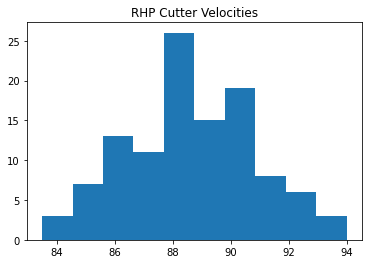

In [249]:
plt.hist(df.release_speed)
plt.title('RHP Cutter Velocities')
#plt.subtitle('Mean: {}, Std: {}'.format(mu,std))

In [250]:
x = 'release_speed'
mu = round(df[x].mean(),2)
std = round(df[x].std(),3)
low = df[x].mean() - df[x].std() # mu - std 
high = df[x].mean() + df[x].std() # mu + std
print('Mean: {} | Std: {}'.format(mu,std))
print(low.round(3), high.round(3))

Mean: 88.64 | Std: 2.214
86.425 90.854


In [251]:
mcgarry[mcgarry.pitch_type == 'FC'].release_speed.mean(), round(mcgarry[mcgarry.pitch_type == 'FC'].release_speed.std(),2)

(88.35, 1.69)

In [252]:
mcgarry[mcgarry.pitch_type == 'FC'].release_spin_rate.mean(), round(mcgarry[mcgarry.pitch_type == 'FC'].release_spin_rate.std(),2)

(2738.0, 128.74)

### Every McGarry Cutter [88.35 mph (86.6 - 90), 2738 rpm (2600 - 2850)]

I got all 8 of his cutters from Spring Training this year, so I am going to comment on them.
1. video was not so great, and neither was the cutter
2. Nasty cutter, Termarr Johnson lays off but tight spin, perhaps never looked like a strike.
3. Not a good pitch, bounced a first pitch cutter to Vladdy
4. Decent cutter, pulled catcher into LHB batter's box. Never looked like a strike. Springer slight flinch.
5. 0-1 cutter to Escobar (WHAT WAS SEQUENCE?) 
6. 2-0 to IKF never near Zone 9 just a dud in 14 the whole time. 87 mph 2500 spin. Yanked it.
7. Just Stats - 91.1, 2817, 
8. Just Stats - 

In [253]:
mcgarry_sl_mu = mcgarry[mcgarry.pitch_type == 'SL'].release_speed.mean()
mcgarry_sl_std = mcgarry[mcgarry.pitch_type == 'SL'].release_speed.std()
mcgarry_sl_mu.round(1), round(mcgarry_sl_std,1), mcgarry_sl_mu-mcgarry_sl_std, mcgarry_sl_mu+mcgarry_sl_std 

(87.6, 0.8, 86.80673245898814, 88.32660087434519)

In [254]:
mu_spin_71 = mcgarry[mcgarry.pitch_type == 'SL'].release_spin_rate.mean()
std_spin_71 = mcgarry[mcgarry.pitch_type == 'SL'].release_spin_rate.std()
mu_spin_71, std_spin_71, mu_spin_71-std_spin_71, mu_spin_71+std_spin_71

(2632.8888888888887, 50.77264136433234, 2582.1162475245565, 2683.661530253221)

### Every Slider [87.6 mph (86.8 - 88.4), 2633 rpm (2580 - 2680)] 

Let's go through all 9 of his sliders from Spring Training. They were all in this outing @ PIT.

1. The first one slipped out of his hand to Billy McKinney, zone 11, he spits on it.
2. In a jam, he throws a 1-0 slider to the lefty Cheng who gets jammed and pops out to the left fielder. Runner on 3rd stuck
3. Then he starts off Termarr Johnson with a nice slider to the back foot for a whiff. REally quality pitch, but it looks more like a Cutter to me. Low spin for a cutter, velo is pretty much bang on average. Would be a really high velo, low spin look for a slider.
4. Full count slider to Termarr Johnson that looks pretty good, catches a lot of the plate and he pulls foul down 1B line.
5. Whose your daddy slider to Joe Perez, excellent velo and low spin, buries it in zone 14. 0-0 count. Assuming it stayed in the zone for a long time before darting into the dirt. This is one I think you have to feel good about.
6. Then he throws his most average slider and gets a little lucky with the called strike to Joe Perez. He got a K in this AB
<br>*The next three are a tremendous put away to Jack Brannigan with the bases loaded. He goes down 2-0, then hits him with a White Castle Special*
7. Swings right through an unremarkable but well-called slider. Gets it down but, this was more about strategy to my eye.
8. Don't worry though, he can still spot this slider in zone 9, which is exactly what he does with this spin doctor's mix.
9. Brannigan should know the slider is coming but seems unsure to swing, throwing his barrel to it and pking a soft line drive to SS.

In [255]:
# Let's look at the results for comparable sliders

In [256]:
df = sl = pps[pps.pitch_type == 'SL']

In [257]:
mu_sls = sl[(sl.p_throws == 'R')].groupby(['player_name'
                                  ,'game_year'
                                 ],as_index=False).agg({'release_speed' : 'mean'
                                                        ,'release_spin_rate' : 'mean'
                                                       }).round(1)

In [258]:
mu_sls[(mu_sls.release_speed >= mcgarry_sl_mu-mcgarry_sl_std)
       &(mu_sls.release_speed <= mcgarry_sl_mu+mcgarry_sl_std)
       &(mu_sls.release_spin_rate >= mu_spin_71-std_spin_71)
       &(mu_sls.release_spin_rate <= mu_spin_71+std_spin_71)
      ]
# All that to find out that Yunior Marte is the only one with a comparable slider

,player_name,game_year,release_speed,release_spin_rate
13,"McGarry, Griff",2024,87.6,2632.9


In [259]:
yunior = pps[pps.pitcher == pps[pps.player_name == 'Marte, Yunior'].pitcher.tolist()[0]]
yunior_sl = yunior[yunior.pitch_type == 'SL']

In [260]:
df = yunior_sl
results('stand')

KeyError: "Column(s) ['wBB'] do not exist"

In [ ]:
pitch_mix(mcgarry[mcgarry.stand == 'R'])

Griff McGarry's slider profiles most closely to Yunior Marte. Marte uses his slider to great effect against lefties but not so much against righties. McGarry could try attacking LHB with his SL.

His Cutter could be more effective against righties, but I think there is enough overlap between his cutter and slider that they both end up being his point of attack to RHB. I have concerns about how that will play.

He cannot command his cutter yet.

# Three Run Homers

In [24]:
hrs = pos[pos.events == 'home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'hrs'})
df = three_run_hrs = pos[(pos.post_bat_score - pos.bat_score == 3) & (pos.events == 'home_run')]
df = df_merged = df.groupby('game_year',as_index=False
          ).agg({'des' : 'count'}
               ).merge(hrs, left_on='game_year', right_on='game_year'
                      ).rename(columns = {'des' : 'threerunHRs'})
df['share'] = df.threerunHRs / df.hrs

In [27]:
df.round(3)

,game_year,threerunHRs,hrs,share
0,2015,23,130,0.177
1,2016,23,161,0.143
2,2017,21,174,0.121
3,2018,28,186,0.151
4,2019,17,215,0.079
5,2020,16,82,0.195
6,2021,24,198,0.121
7,2022,32,229,0.140
8,2023,25,244,0.102


In [36]:
df = three_run_hrs
df[df.game_year == 2020].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                    #,'delta_home_win_exp' : 'sqrt'
                                                                   }
                                                                  )

,player_name,des
0,"Bruce, Jay",2
1,"Gregorius, Didi",1
2,"Harper, Bryce",3
3,"Hoskins, Rhys",2
4,"Kingery, Scott",1
5,"Knapp, Andrew",1
6,"Marchán, Rafael",1
7,"McCutchen, Andrew",1
8,"Realmuto, J.T.",4


# Stolen Bases

In [262]:
pps[(pps.game_date == '2023-10-23')
    &(pps.player_name == 'Kerkering, Orion')
    &(pps.events == 'strikeout')
   ].columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat